<a href="https://colab.research.google.com/github/RodrigoDSVDF/An-lise-de-Dados/blob/main/BolsaProjeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-datareader


  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install yfinance



  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
      --------------------------------------- 0.0/2.9 MB 960.0 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.9 MB 3.5 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/2.9 MB 4.6 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/2.9 MB 5.3 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/2.9 MB 5.8 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/2.9 MB 5.9 MB/s eta 0:00:01
     --------------------------- -------

In [ ]:

import pandas as pd

import matplotlib.pyplot as plt

import yfinance as yf




In [ ]:

cotacao_bovespa = yf.download('^BVSP', start='2018-01-01', end='2023-12-30')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
display(cotacao_bovespa)

Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2018-01-02   76403.0   77909.0   76403.0   77891.0    77891.0  2880300
2018-01-03   77889.0   78414.0   77602.0   77995.0    77995.0  3142200
2018-01-04   77998.0   79135.0   77998.0   78647.0    78647.0  3486100
2018-01-05   78644.0   79071.0   78218.0   79071.0    79071.0  2747100
2018-01-08   79070.0   79395.0   78631.0   79379.0    79379.0  2550800
...              ...       ...       ...       ...        ...      ...
2023-12-21  130826.0  132277.0  130822.0  132182.0   132182.0  8681000
2023-12-22  132553.0  133035.0  132094.0  132753.0   132753.0  8231100
2023-12-26  132753.0  133645.0  132753.0  133533.0   133533.0        0
2023-12-27  133523.0  134195.0  133328.0  134194.0   134194.0  6168200
2023-12-28  134194.0  134392.0  133832.0  134185.0   134185.0  7812700

[1486 rows x 6 columns]

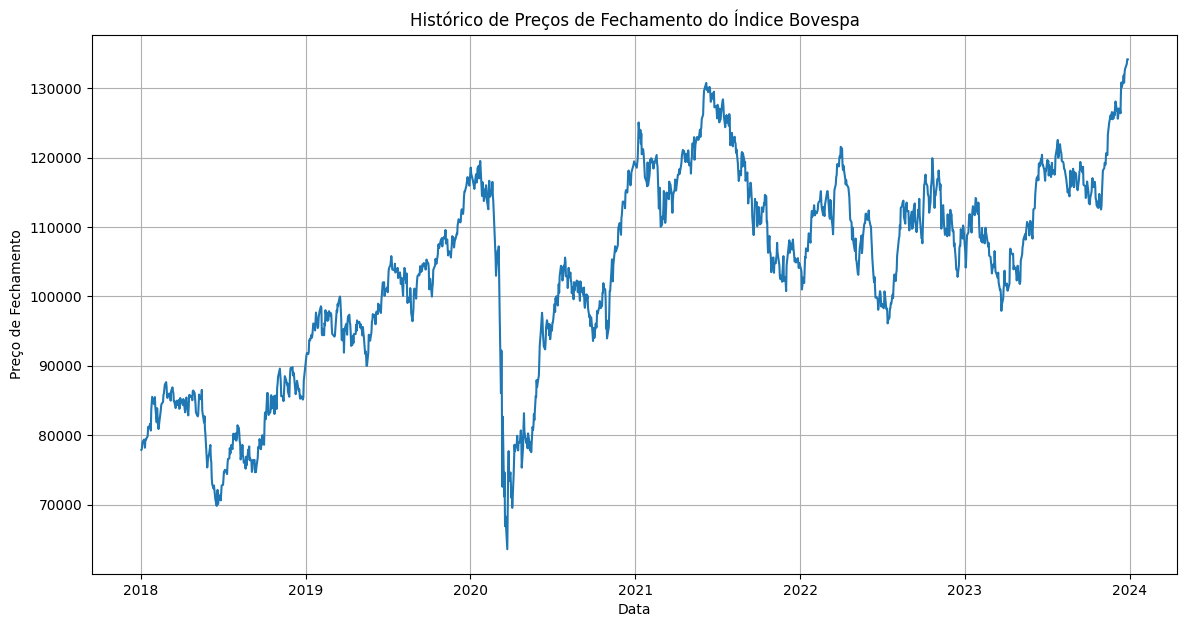

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(14,7))
plt.plot(cotacao_bovespa['Close'])
plt.title('Histórico de Preços de Fechamento do Índice Bovespa')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_8808\1835385843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacao_bovespa_2023['Variacao Percentual Diaria'] = cotacao_bovespa_2023['Close'].pct_change()


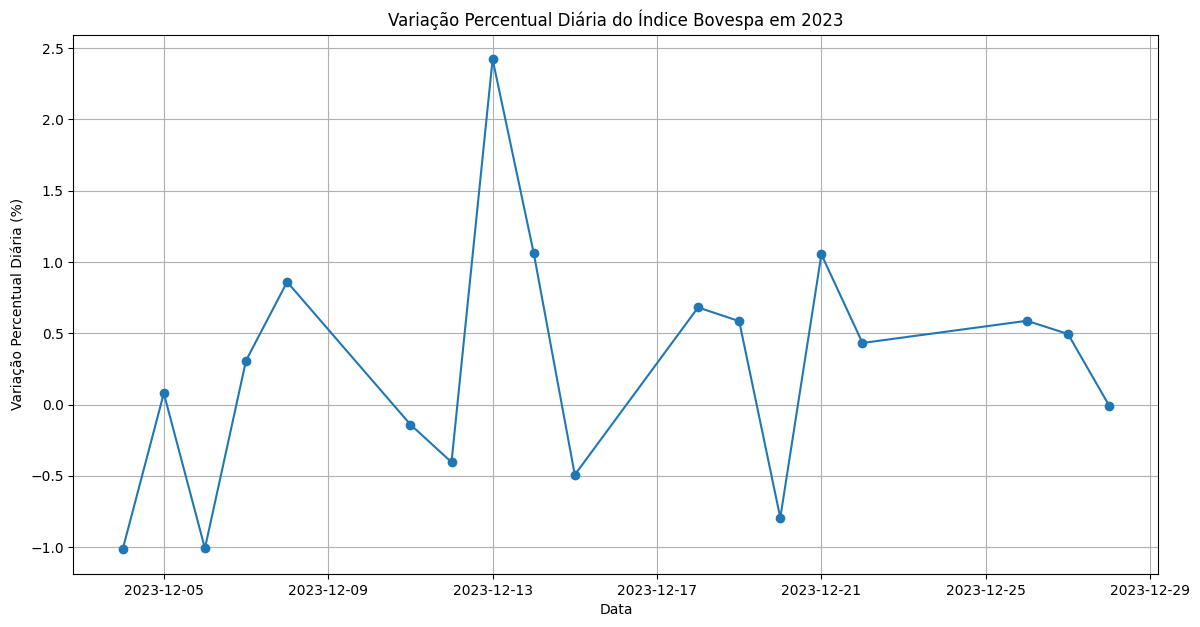

In [ ]:

# Filtrando os dados para o ano de 2023
cotacao_bovespa_2023 = cotacao_bovespa.loc['2023-12-01':'2023-12-31']

# Calculando a variação percentual diária
cotacao_bovespa_2023['Variacao Percentual Diaria'] = cotacao_bovespa_2023['Close'].pct_change()

# Plotando o gráfico de linha
plt.figure(figsize=(14, 7))
plt.plot(cotacao_bovespa_2023.index, cotacao_bovespa_2023['Variacao Percentual Diaria'] * 100, marker='o', linestyle='-')
plt.title('Variação Percentual Diária do Índice Bovespa em 2023')
plt.xlabel('Data')
plt.ylabel('Variação Percentual Diária (%)')
plt.grid(True)
plt.show()




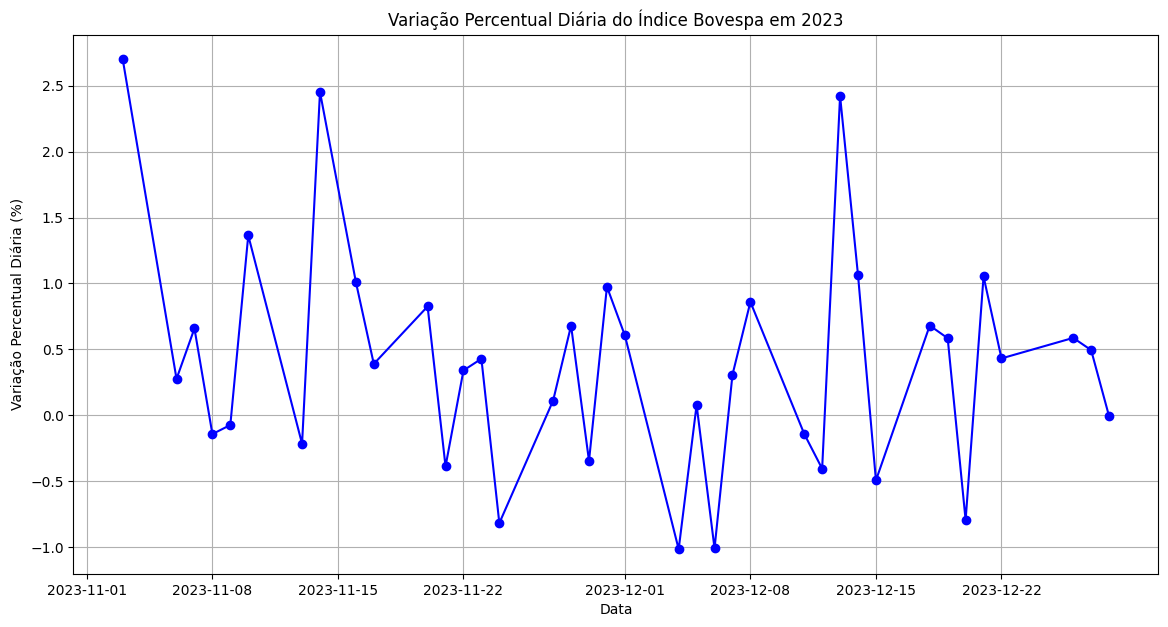

In [ ]:
cotacao_bovespa_2023 = cotacao_bovespa.loc['2023-11-01':'2023-12-31'].copy()

# Calcular a variação percentual diária
cotacao_bovespa_2023['Variacao Percentual Diaria'] = cotacao_bovespa_2023['Close'].pct_change() * 100

# Plotar o gráfico de linha
plt.figure(figsize=(14, 7))
plt.plot(cotacao_bovespa_2023.index, cotacao_bovespa_2023['Variacao Percentual Diaria'], marker='o', linestyle='-', color='blue')
plt.title('Variação Percentual Diária do Índice Bovespa em 2023')
plt.xlabel('Data')
plt.ylabel('Variação Percentual Diária (%)')
plt.grid(True)
plt.show()


In [ ]:
# Substitua os valores NaN pela média da coluna
cotacao_bovespa['Variacao Diaria'].fillna(cotacao_bovespa['Variacao Diaria'].mean(), inplace=True)


In [ ]:
# Remova as linhas que contêm NaN na coluna 'Variacao Diaria'
cotacao_bovespa = cotacao_bovespa.dropna(subset=['Variacao Diaria'])


In [ ]:
print(cotacao_bovespa['Variacao Diaria'].isna().any())  # Verifica se há algum valor NaN
print((cotacao_bovespa['Variacao Diaria'] == float('inf')).any())  # Verifica se há algum valor infinito


True
False


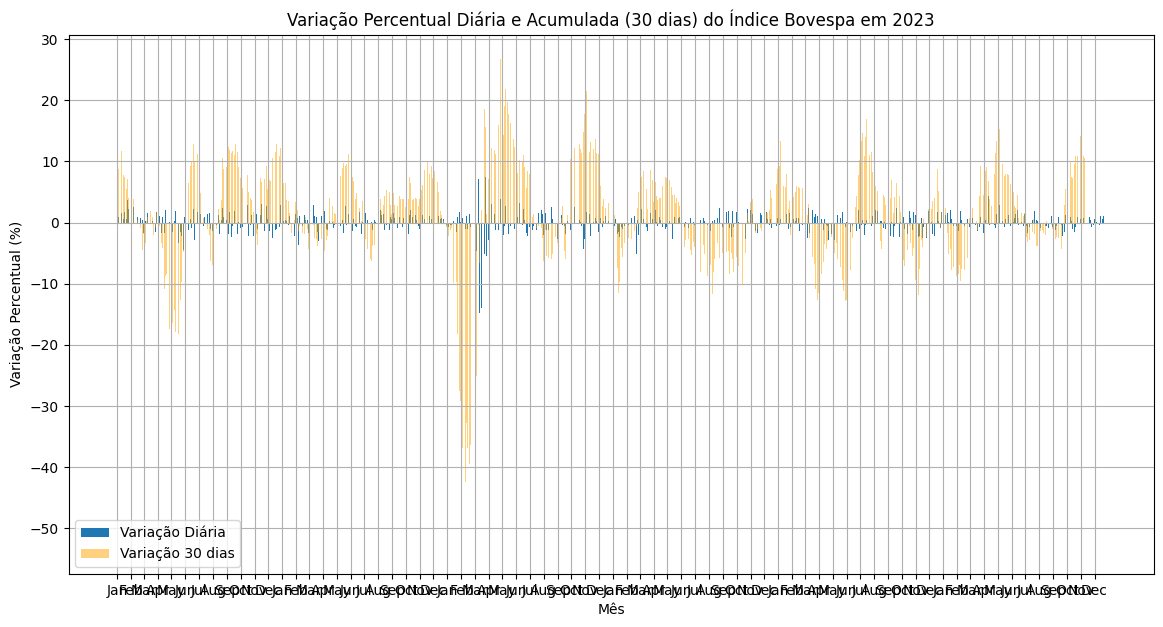

In [ ]:
import matplotlib.pyplot as plt

# Calculando a variação diária
cotacao_bovespa['Variacao Diaria'] = cotacao_bovespa['Close'].pct_change()

# Calculando a variação acumulada dos últimos 30 dias
ultimos_30_dias = cotacao_bovespa['Variacao Diaria'].iloc[::-1].rolling(window=30).sum()

# Plotando o gráfico de barras
plt.figure(figsize=(14, 7))

# Adicionando as barras mensais
bars = plt.bar(cotacao_bovespa.index[::-1], cotacao_bovespa['Variacao Diaria'].iloc[::-1] * 100, label='Variação Diária')

# Adicionando a variação acumulada dos últimos 30 dias como barras
plt.bar(cotacao_bovespa.index[::-1], ultimos_30_dias * 100, label='Variação 30 dias', color='orange', alpha=0.5)

# Obtenha os primeiros dias de cada mês
primeiros_dias = cotacao_bovespa.resample('MS').first().index[::-1]

# Crie uma lista de rótulos para os primeiros dias de cada mês
rotulos = [pd.to_datetime(d).strftime('%b') for d in primeiros_dias]

# Defina os rótulos do eixo x
plt.xticks(primeiros_dias, rotulos)

plt.title('Variação Percentual Diária e Acumulada (30 dias) do Índice Bovespa em 2023')
plt.xlabel('Mês')
plt.ylabel('Variação Percentual (%)')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  1 of 1 completed


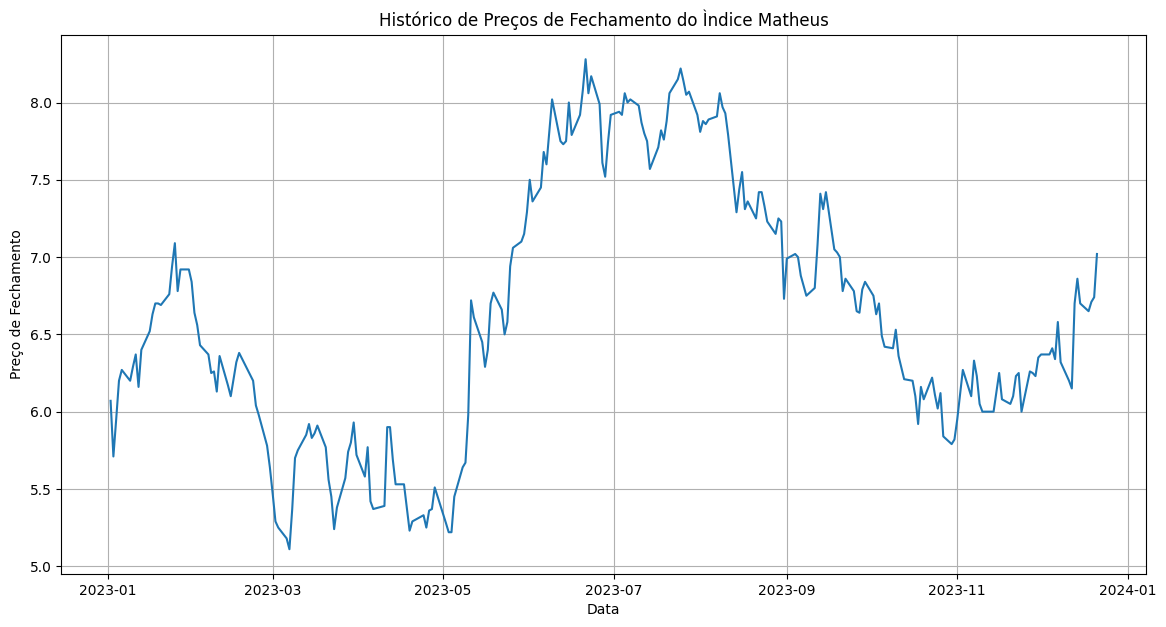

In [ ]:



cotacao_bovespa1 = yf.download('GMAT3.SA', start='2023-01-01', end='2023-12-22')
plt.figure(figsize=(14,7))
plt.plot(cotacao_bovespa1['Close'])
plt.title('Histórico de Preços de Fechamento do Ìndice Matheus')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_21640\738648289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacao_2023['Variacao Percentual'] = cotacao_2023['Close'].pct_change()


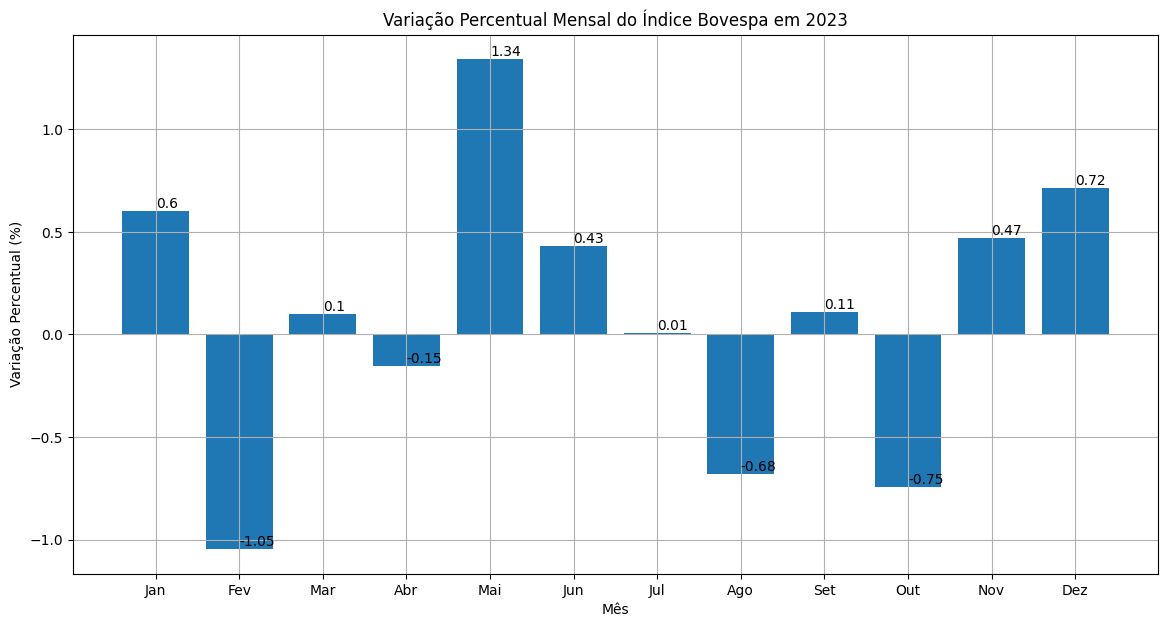

In [ ]:
 # Filtrando os dados para o ano de 2023
cotacao_2023 = cotacao_bovespa1.loc['2023-01-01':'2023-12-31']

# Calculando a variação percentual mês a mês
cotacao_2023['Variacao Percentual'] = cotacao_2023['Close'].pct_change()

# Agrupando os dados por mês e calculando a variação percentual média
cotacao_bovespa_2023_mensal = cotacao_2023.resample('M').mean()



#Plotando o gráfico de barras
plt.figure(figsize=(14,7))
bars = plt.bar(cotacao_bovespa_2023_mensal.index.month, cotacao_bovespa_2023_mensal['Variacao Percentual'] * 100)

# Adicionando a variação percentual em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom') # va: vertical alignment

# Nomeando os meses no eixo x
plt.xticks(cotacao_bovespa_2023_mensal.index.month, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

plt.title('Variação Percentual Mensal do Índice Bovespa em 2023')
plt.xlabel('Mês')
plt.ylabel('Variação Percentual (%)')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


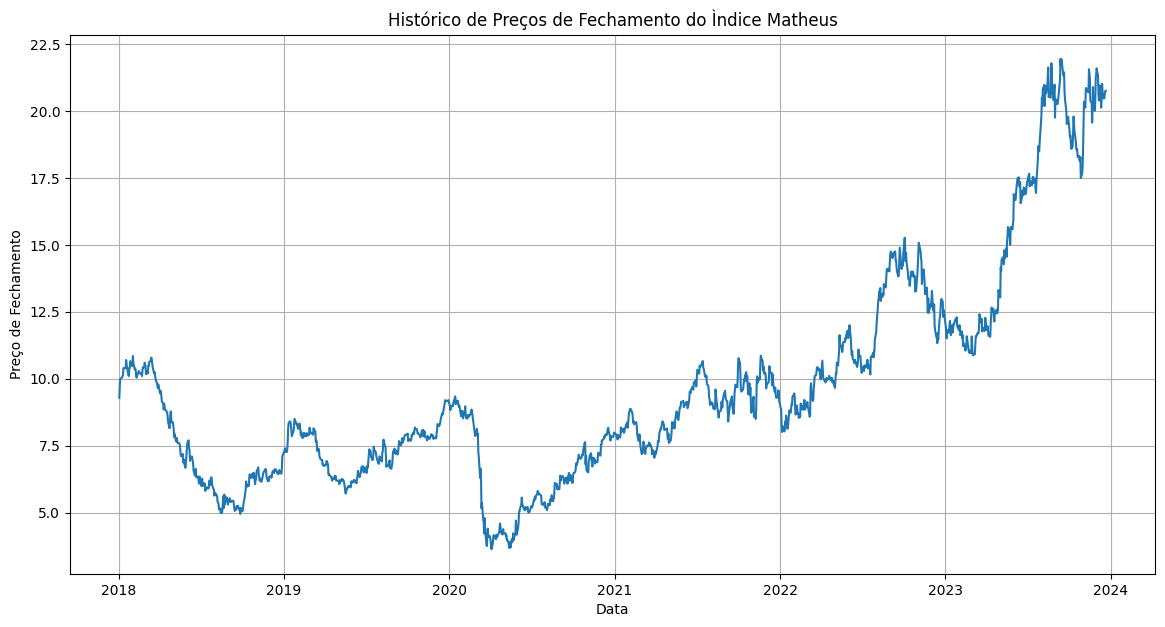

In [ ]:
cotacao_bovespa1 = yf.download('VULC3.SA', start='2018-01-01', end='2023-12-22')
plt.figure(figsize=(14,7))
plt.plot(cotacao_bovespa1['Close'])
plt.title('Histórico de Preços de Fechamento do Ìndice Matheus')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


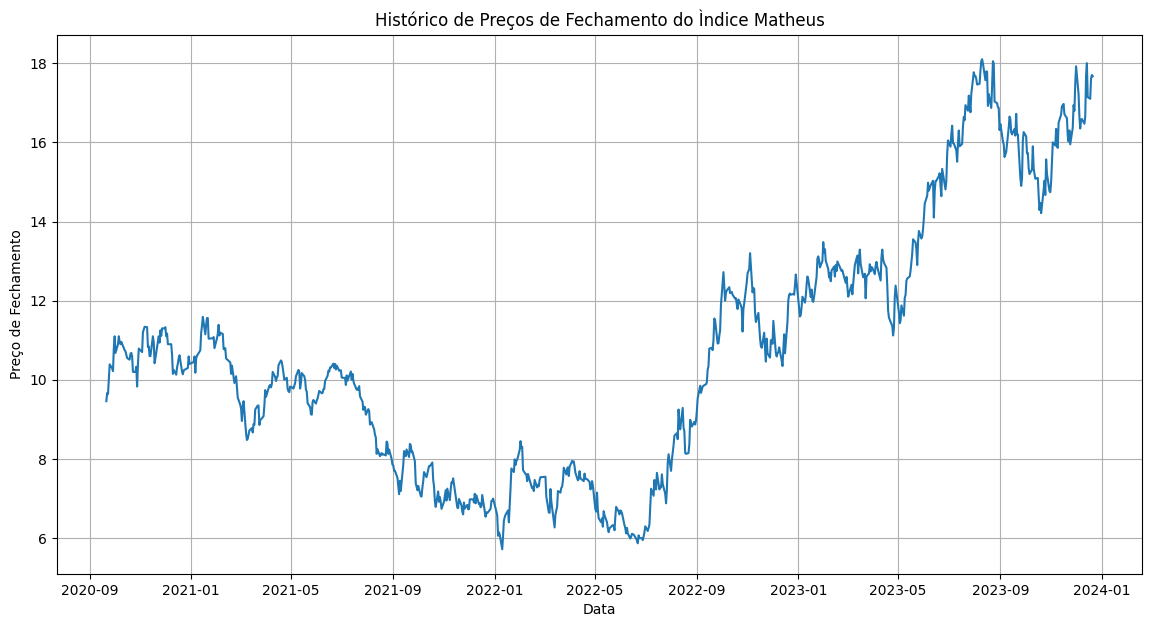

In [ ]:
cotacao_bovespa1 = yf.download('CURY3.SA', start='2018-01-01', end='2023-12-22')
plt.figure(figsize=(14,7))
plt.plot(cotacao_bovespa1['Close'])
plt.title('Histórico de Preços de Fechamento do Ìndice Matheus')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

# Petrobras (PETR4): R$436 bilhões
# Vale (VALE3): R$295 bilhões
# Itaú Unibanco (ITUB4): R$248 bilhões
# Ambev (ABEV3): R$218 bilhões
# Weg (WEGE3): R$150 bilhões
# Bradesco (BBDC4): R$150 bilhões
# Banco do Brasil (BBAS3): R$135 bilhões
# BTG (BPAC11): R$125 bilhões
# Santander (BCSA34): R$102 bilhões
# ITAUSA (ITSA4): R$ 90 bilhões

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


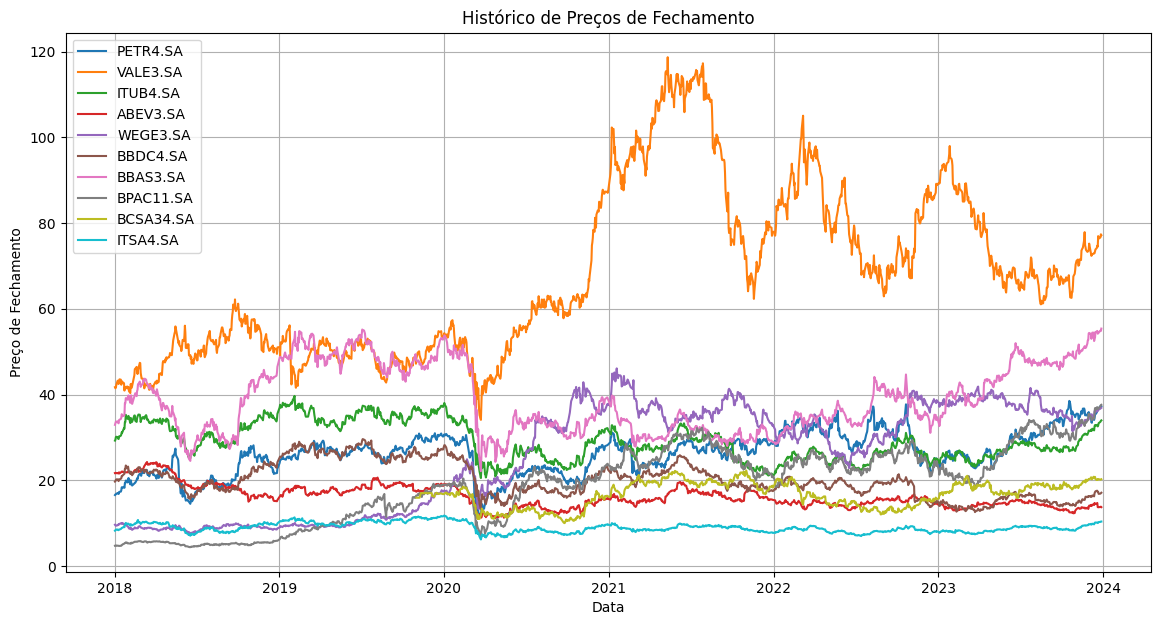

In [ ]:

# Lista de empresas
empresas = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'ABEV3.SA', 'WEGE3.SA', 'BBDC4.SA', 'BBAS3.SA', 'BPAC11.SA', 'BCSA34.SA', 'ITSA4.SA']

# Baixando os dados
dados_empresas = {empresa: yf.download(empresa, start='2018-01-01', end='2023-12-30') for empresa in empresas}

# Plotando o gráfico
plt.figure(figsize=(14,7))
for empresa, dados in dados_empresas.items():
    plt.plot(dados['Close'], label=empresa)
plt.title('Histórico de Preços de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Petrobras (PETR4): R$436 bilhões
Vale (VALE3): R$295 bilhões
Itaú Unibanco (ITUB4): R$248 bilhões
Ambev (ABEV3): R$218 bilhões
Weg (WEGE3): R$150 bilhões
Bradesco (BBDC4): R$150 bilhões
Banco do Brasil (BBAS3): R$135 bilhões
BTG (BPAC11): R$125 bilhões
Santander (BCSA34): R$102 bilhões
ITAUSA (ITSA4): R$ 90 bilhões

In [ ]:
tabela = pd.read_csv(r"C:\Users\Rodrigo_df\empresas_b3.csv")

In [ ]:
display(tabela)

Enumeração                   Empresa   Sigla
0            1           Banco do Brasil   BBAS3
1            2                 Petrobrás   PETR4
2            3                     Taesa  TAEE11
3            4             BB SEGURIDADE   BBSE3
4            5                    ITAUSA   ITSA4
5            6                 ISA CTEEP   TRPL4
6            7                      Vale   VALE3
7            8                     CEMIG   CMIG4
8            9          CAIXA SEGURIDADE   CXSE3
9           10        METALURGICA GERDAU   GOAU4
10          11                     COPEL   CPLE6
11          12         UNIPAR CARBOCLORO   UNIP6
12          13                    Klabin  KLBN11
13          14             CSN MINERAÇÃO   CMIN3
14          15                       WEG   WEGE3
15          16            CELULOSE IRANI   RANI3
16          17         AUREN ENERGIA S.A   AURE3
17          18                BRASILAGRO   AGRO3
18          19            Banco Bradesco   BBDC3
19          20                    COPASA   CSMG3
20          21                   Sanepar  SAPR11
21          22                AES BRASIL   AESB3
22          23              ENGIE BRASIL   EGIE3
23          24          BANCO ABC BRASIL   ABCB4
24          25              KEPLER WEBER   KEPL3
25          26                   MARFRIG   MRFG3
26          27          MAHLE-METAL LEVE   LEVE3
27          28       Banco Itau Unibanco   ITUB4
28          29                     COSAN   CSAN3
29          30                 SANTANDER  SANB11
30          31                        B3   B3SA3
31          32                    GERDAU   GGBR3
32          33                 BRADESPAR   BRAP4
33          34            BANCO BANRISUL   BRSR6
34          35                 BANCO BMG   BMGB4
35          36              CPFL ENERGIA   CPFE3
36          37  VIVO - TELEFÔNICA BRASIL   VIVT3
37          38              PORTO SEGURO   PSSA3
38          39  CIA SIDERURGICA NACIONAL   CSNA3
39          40           INDÚSTRIAS ROMI   ROMI3
40          41              GRUPO MATEUS   GMAT3
41          42                 VulcaBras   VULC3
42          43                      Curi   CURY3
43          44                 Petrobras   PETR4
44          45                      Vale   VALE3
45          46             Itau Unibanco   ITUB4
46          47                     Ambev   ABEV3
47          48                       Weg   WEGE3
48          49                  Bradesco   BBDC4
49          50           Banco do Brasil   BBAS3
50          51                       BTG  BPAC11
51          52                 Santander  BCSA34
52          53                    ITAUSA   ITSA4

BBAS3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  34.220001  34.220001  32.900002  33.259998  30.695686  11778500
2023-01-03  33.259998  33.400002  32.419998  32.639999  30.123491  10773700
2023-01-04  32.830002  33.259998  32.560001  33.060001  30.511114   9759500
2023-01-05  33.290001  34.740002  33.080002  34.570000  31.904694  16968800
2023-01-06  34.650002  35.270000  34.439999  35.049999  32.347683  14752300
...               ...        ...        ...        ...        ...       ...
2023-12-22  54.500000  54.619999  54.070000  54.439999  54.439999   7303200
2023-12-26  54.439999  54.959999  54.299999  54.939999  54.939999   3983200
2023-12-27  54.799999  54.970001  54.580002  54.860001  54.860001   3372500
2023-12-28  54.860001  55.389999  54.689999  55.389999  55.389999   5840400
2024-01-02  55.119999  55.279999  54.450001  54.759998  54.759998   8170500

[249 rows x 6 columns]

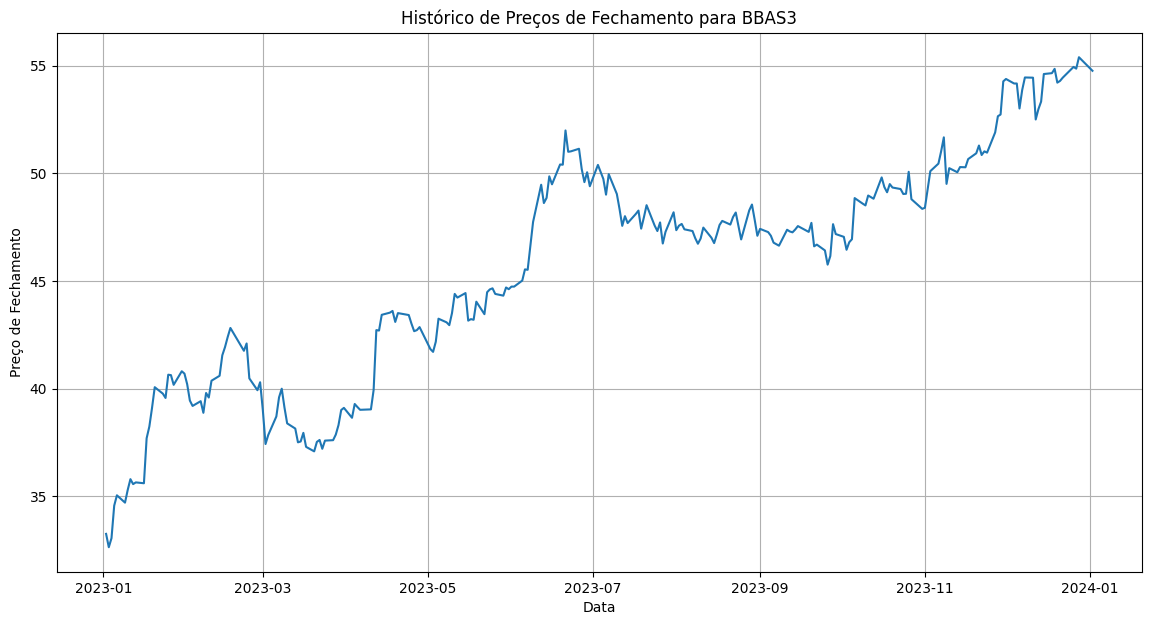

PETR4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-01-02  23.540001  23.809999  22.799999  22.920000  17.760122   78424700
2023-01-03  22.940001  23.100000  22.129999  22.340000  17.310696   96750300
2023-01-04  21.959999  23.590000  21.830000  23.049999  17.860855  129504000
2023-01-05  23.340000  24.040001  23.150000  23.879999  18.504002   73886000
2023-01-06  23.940001  24.320000  23.549999  23.740000  18.395519   51851500
...               ...        ...        ...        ...        ...        ...
2023-12-22  36.500000  36.799999  36.369999  36.740002  36.740002   31234700
2023-12-26  36.860001  37.369999  36.830002  37.330002  37.330002   23466800
2023-12-27  37.320000  37.430000  37.130001  37.360001  37.360001   19588500
2023-12-28  37.230000  37.360001  37.040001  37.240002  37.240002   21421900
2024-01-02  37.439999  37.889999  37.400002  37.779999  37.779999   24043800

[249 rows x 6 columns]

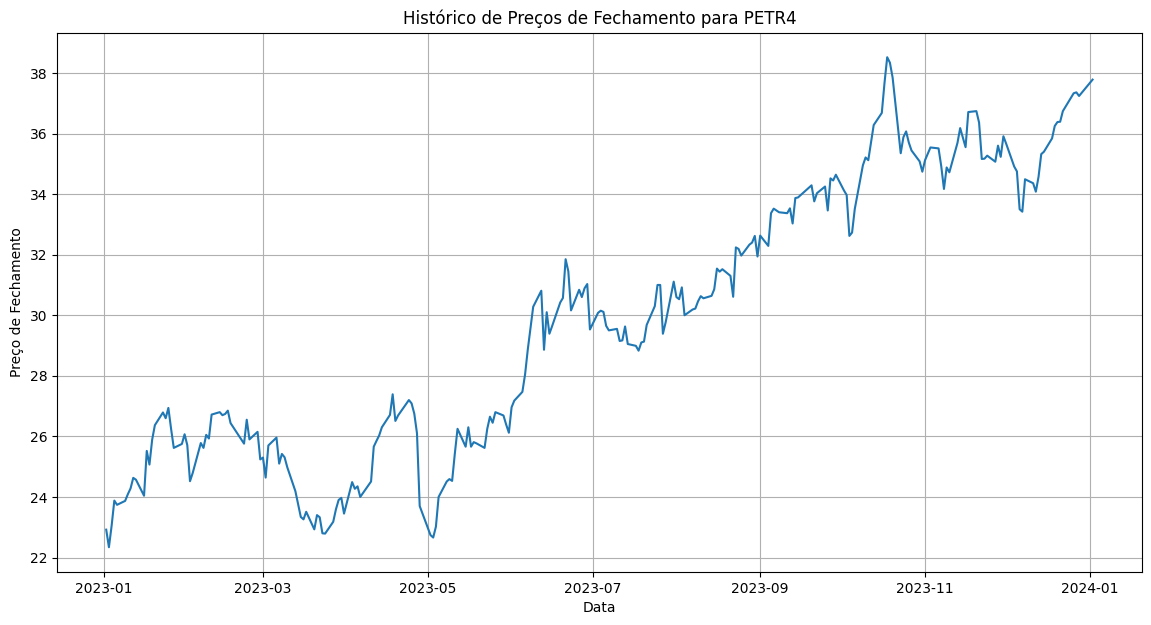

TAEE11
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  34.680000  34.970001  34.099998  34.320000  31.073456  1268100
2023-01-03  34.380001  34.630001  33.919998  33.959999  30.747513  1666800
2023-01-04  34.009998  34.380001  33.779999  33.919998  30.711298  1855700
2023-01-05  34.060001  34.299999  33.860001  34.060001  30.838057  1676900
2023-01-06  34.849998  36.040001  34.849998  35.369999  32.024132  6293300
...               ...        ...        ...        ...        ...      ...
2023-12-22  37.349998  37.770000  37.310001  37.619999  36.971096  1109800
2023-12-26  37.619999  37.720001  37.349998  37.700001  37.049717  1135500
2023-12-27  37.700001  37.930000  37.490002  37.759998  37.108681   650100
2023-12-28  38.000000  38.459999  37.900002  38.380001  37.717991  1739100
2024-01-02  38.549999  38.619999  38.020000  38.130001  37.472301  2001500

[248 rows x 6 columns]

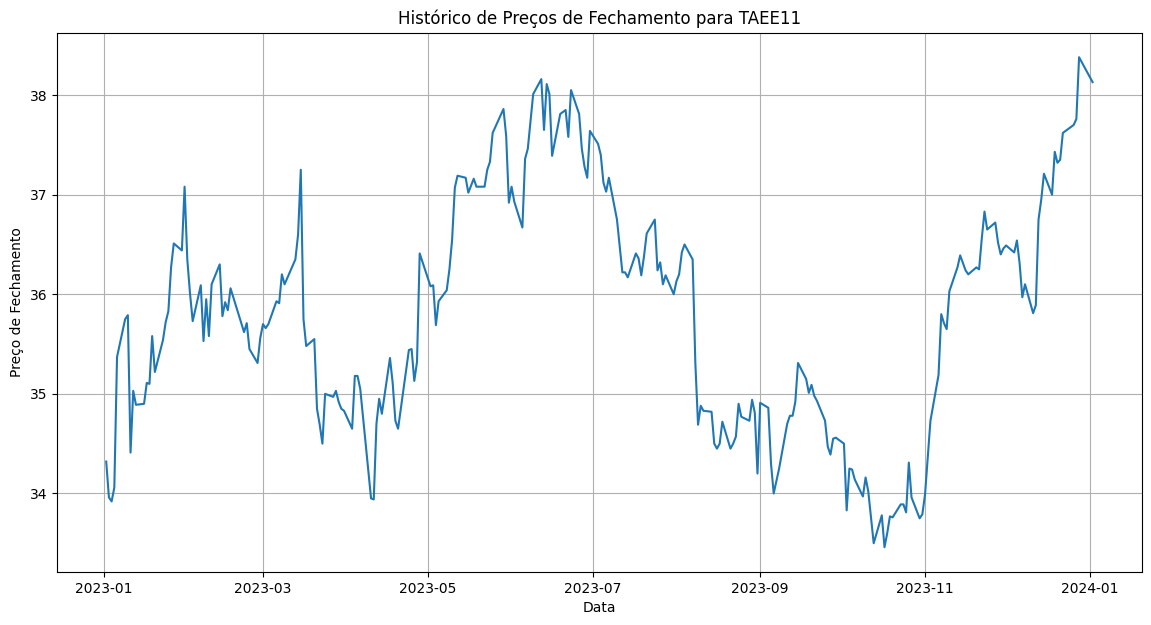

BBSE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  33.349998  33.779999  33.029999  33.389999  30.109886  2509400
2023-01-03  33.299999  33.630001  32.070000  32.349998  29.172049  5148200
2023-01-04  32.630001  33.180000  32.330002  32.509998  29.316332  5921800
2023-01-05  32.680000  33.139999  32.250000  32.580002  29.379459  6885300
2023-01-06  32.580002  33.540001  32.439999  33.529999  30.236130  3722200
...               ...        ...        ...        ...        ...      ...
2023-12-22  33.150002  33.470001  33.119999  33.360001  33.360001  2546200
2023-12-26  33.380001  33.619999  33.320000  33.610001  33.610001  1932400
2023-12-27  33.610001  33.610001  33.320000  33.380001  33.380001  2464600
2023-12-28  33.380001  33.650002  33.340000  33.650002  33.650002  2512300
2024-01-02  33.650002  33.959999  33.590000  33.889999  33.889999  3584300

[249 rows x 6 columns]

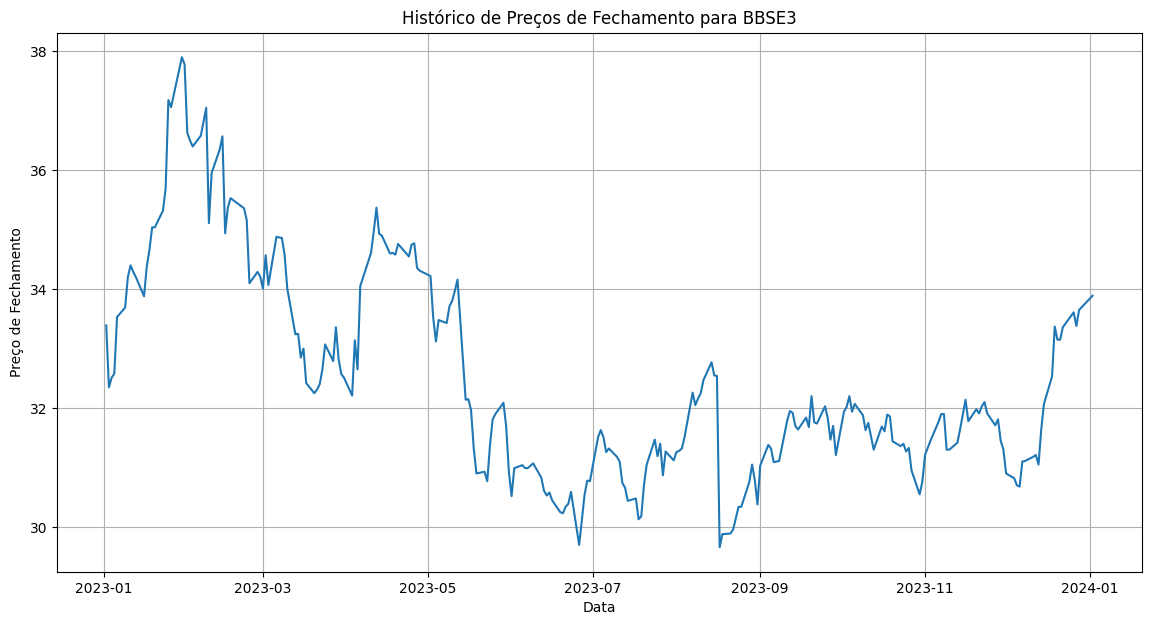

ITSA4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02   8.004242   8.013726   7.833535   7.928372   7.416377  16011051
2023-01-03   7.937856   7.975791   7.700763   7.729215   7.230082  17995298
2023-01-04   7.786117   7.852503   7.710247   7.795600   7.292180  19707815
2023-01-05   7.833535   7.928372   7.767149   7.909405   7.398637  28182989
2023-01-06   7.918889   8.070628   7.918889   8.042177   7.522834  21406308
...               ...        ...        ...        ...        ...       ...
2023-12-22  10.120000  10.250000  10.100000  10.250000  10.250000  13166900
2023-12-26  10.250000  10.290000  10.190000  10.280000  10.280000  13047500
2023-12-27  10.250000  10.400000  10.230000  10.360000  10.360000  19380500
2023-12-28  10.360000  10.400000  10.300000  10.370000  10.370000  23414900
2024-01-02  10.310000  10.320000  10.130000  10.170000  10.170000  16813400

[249 rows x 6 columns]

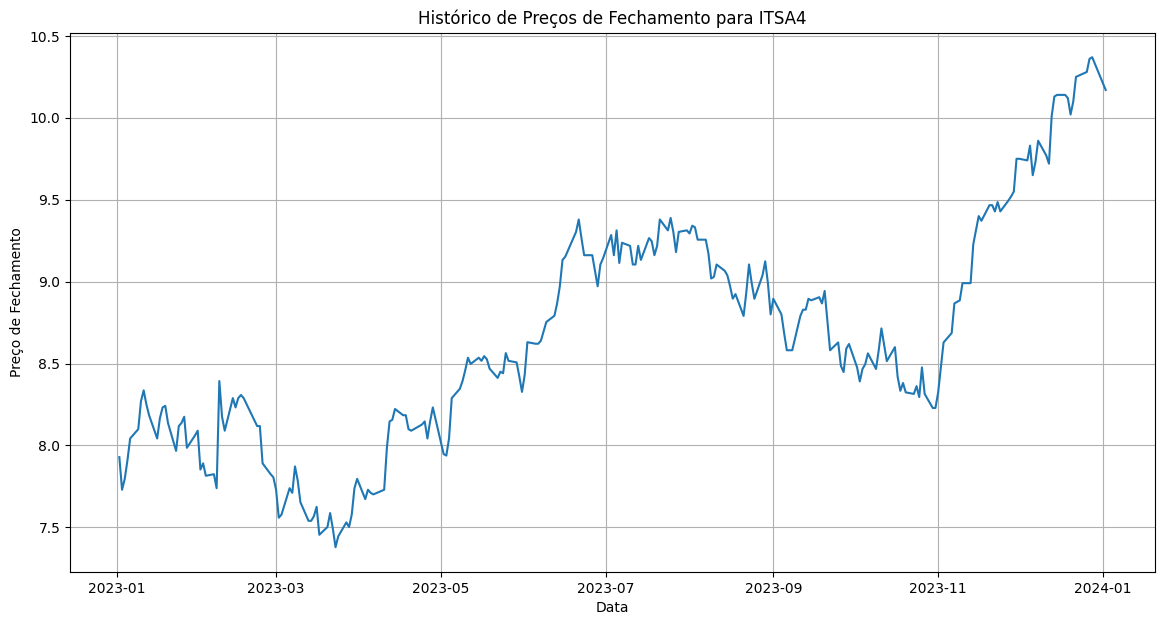

TRPL4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  22.990000  22.990000  22.549999  22.780001  20.867277   1613200
2023-01-03  22.709999  22.760000  22.180000  22.230000  20.363457   2563200
2023-01-04  22.309999  22.340000  22.059999  22.250000  20.381777   1754200
2023-01-05  22.290001  22.309999  21.910000  22.110001  20.253532   2017200
2023-01-06  22.110001  22.110001  21.719999  21.840000  20.006203   2681700
...               ...        ...        ...        ...        ...       ...
2023-12-22  25.590000  25.650000  25.450001  25.590000  25.590000   1513000
2023-12-26  25.600000  25.870001  25.559999  25.559999  25.559999   1338500
2023-12-27  25.610001  26.100000  25.510000  26.100000  26.100000   1981200
2023-12-28  26.120001  26.680000  26.049999  26.500000  26.500000  12457500
2024-01-02  26.379999  26.680000  25.980000  26.200001  26.200001   2271400

[249 rows x 6 columns]

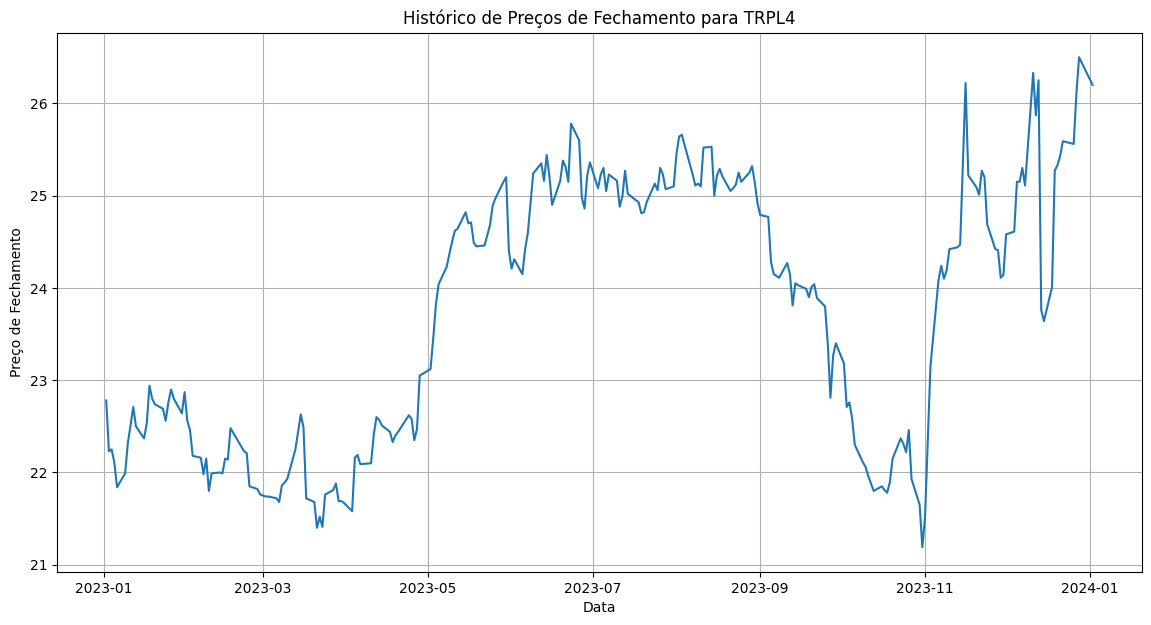

VALE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  88.680000  89.900002  88.529999  89.400002  84.082298  12783800
2023-01-03  89.400002  90.089996  88.889999  89.239998  83.931808  25332600
2023-01-04  89.300003  89.650002  87.949997  89.400002  84.082298  26395300
2023-01-05  89.459999  91.680000  89.000000  90.900002  85.493065  29085600
2023-01-06  91.000000  92.739998  91.000000  92.339996  86.847412  31420600
...               ...        ...        ...        ...        ...       ...
2023-12-22  77.129997  78.199997  76.290001  76.389999  76.389999  26277000
2023-12-26  77.160004  77.449997  76.660004  76.660004  76.660004  12149500
2023-12-27  76.849998  77.550003  76.849998  77.400002  77.400002  13821200
2023-12-28  77.000000  77.459999  76.750000  77.199997  77.199997  16545800
2024-01-02  77.599998  78.180000  76.589996  77.050003  77.050003  18021800

[249 rows x 6 columns]

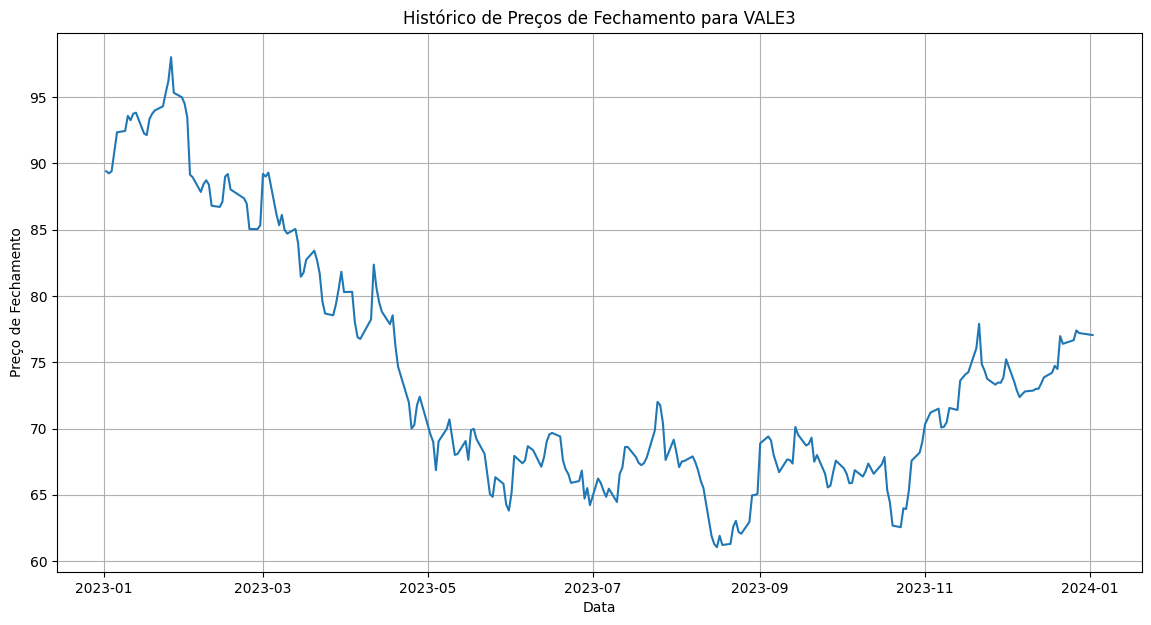

CMIG4
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-01-02  11.07  11.14  10.78  10.91   9.767802   6501200
2023-01-03  10.87  11.05  10.58  10.65   9.535023   9988100
2023-01-04  10.70  10.91  10.46  10.78   9.651413  10292800
2023-01-05  10.87  10.92  10.68  10.88   9.740944  11541400
2023-01-06  10.88  10.94  10.78  10.88   9.740944   9488200
...           ...    ...    ...    ...        ...       ...
2023-12-22  11.10  11.18  10.87  11.01  11.010000  16731300
2023-12-26  11.07  11.27  11.03  11.22  11.220000   7933700
2023-12-27  11.20  11.36  11.12  11.26  11.260000   5984500
2023-12-28  11.25  11.48  11.25  11.48  11.480000  10285700
2024-01-02  11.48  11.50  11.26  11.34  11.340000  10559100

[249 rows x 6 columns]

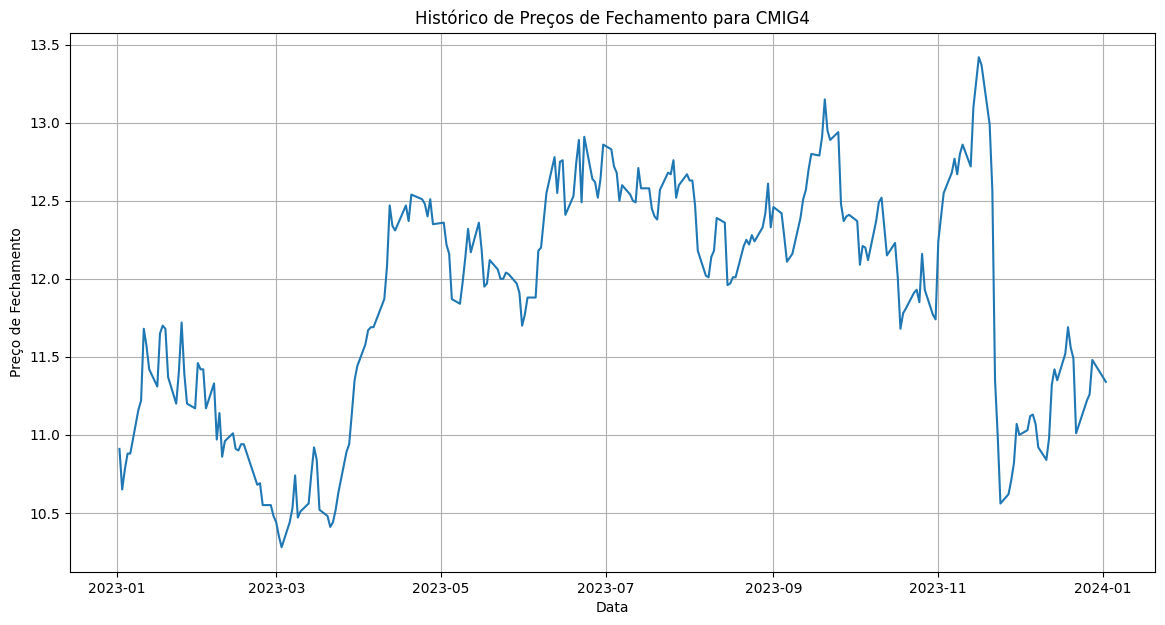

CXSE3
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2023-01-02   8.24   8.25   8.07   8.12   7.369959  1533100
2023-01-03   8.10   8.20   8.03   8.09   7.342730  1404400
2023-01-04   8.11   8.22   8.03   8.15   7.397188  1815200
2023-01-05   8.09   8.20   8.06   8.10   7.351807  2278900
2023-01-06   8.10   8.13   7.97   8.06   7.315501  2151300
...           ...    ...    ...    ...        ...      ...
2023-12-22  12.65  12.70  12.52  12.60  12.600000  1904500
2023-12-26  12.60  12.78  12.60  12.68  12.680000  1388600
2023-12-27  12.68  12.79  12.62  12.66  12.660000  1567400
2023-12-28  12.66  12.90  12.66  12.90  12.900000  1596200
2024-01-02  12.90  12.97  12.80  12.80  12.800000  2156900

[249 rows x 6 columns]

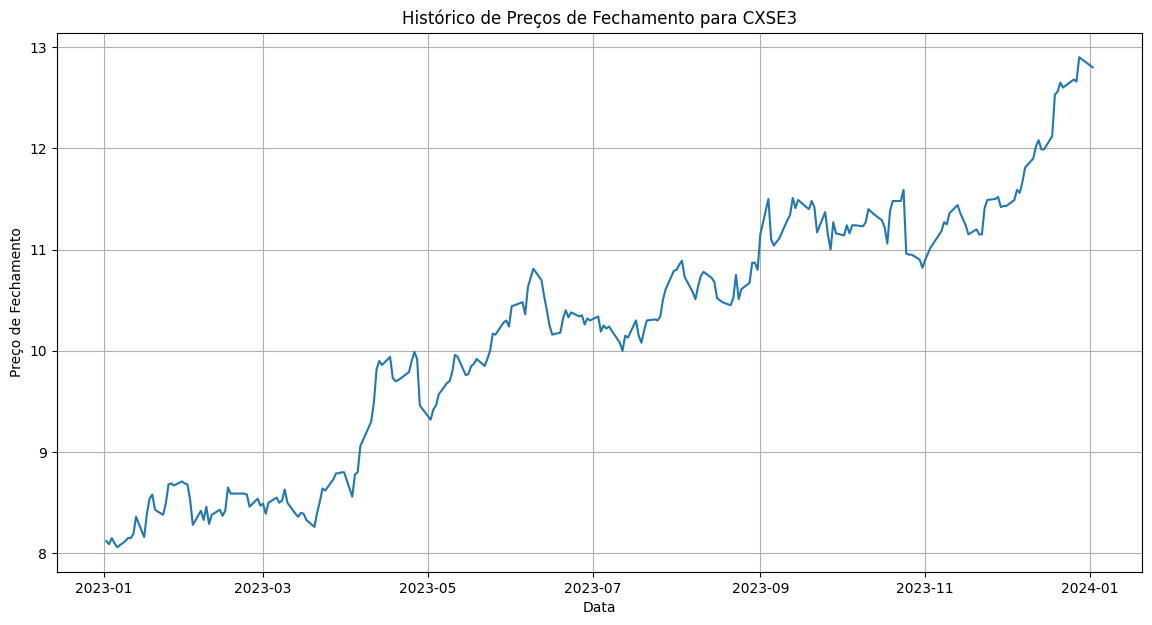

GOAU4
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-01-02  12.80  13.07  12.74  13.05  10.399580   3083800
2023-01-03  13.02  13.23  12.83  12.92  10.295982  13176800
2023-01-04  12.96  13.03  12.76  13.03  10.383642   6484700
2023-01-05  13.09  13.44  12.88  13.25  10.558961  10983700
2023-01-06  13.26  13.61  13.23  13.35  10.638651  10218800
...           ...    ...    ...    ...        ...       ...
2023-12-22  10.74  10.88  10.69  10.81  10.810000   8344400
2023-12-26  10.81  10.84  10.73  10.81  10.810000   4270900
2023-12-27  10.81  10.82  10.75  10.78  10.780000   4592300
2023-12-28  10.79  10.88  10.75  10.86  10.860000   5645600
2024-01-02  10.88  10.94  10.72  10.77  10.770000   8251800

[249 rows x 6 columns]

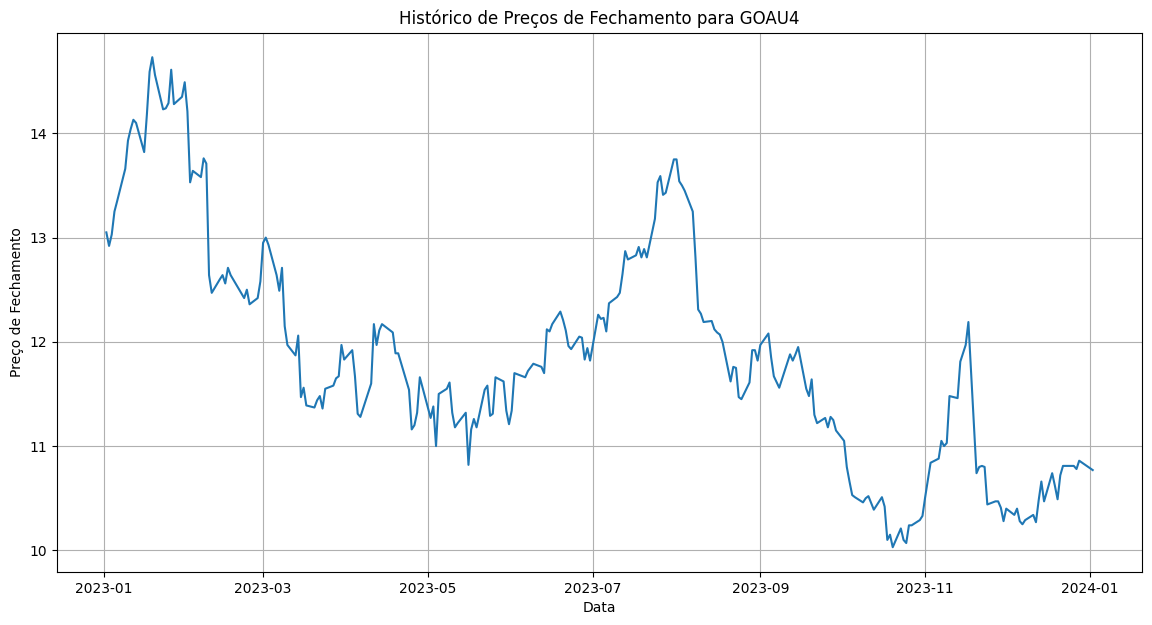

CPLE6
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-01-02   7.81   7.90   7.57   7.64   7.354841   5561000
2023-01-03   7.64   7.70   7.45   7.50   7.220067  13813800
2023-01-04   7.63   7.90   7.55   7.71   7.422229  16913300
2023-01-05   7.74   7.74   7.49   7.65   7.364468  11903000
2023-01-06   7.65   7.70   7.46   7.54   7.258574  14056200
...           ...    ...    ...    ...        ...       ...
2023-12-22  10.13  10.21  10.06  10.18  10.180000   8972600
2023-12-26  10.18  10.41  10.15  10.30  10.300000  15350000
2023-12-27  10.32  10.44  10.23  10.35  10.350000  13627000
2023-12-28  10.37  10.42  10.31  10.36  10.360000   9721200
2024-01-02  10.35  10.36  10.09  10.15  10.150000  14192700

[249 rows x 6 columns]

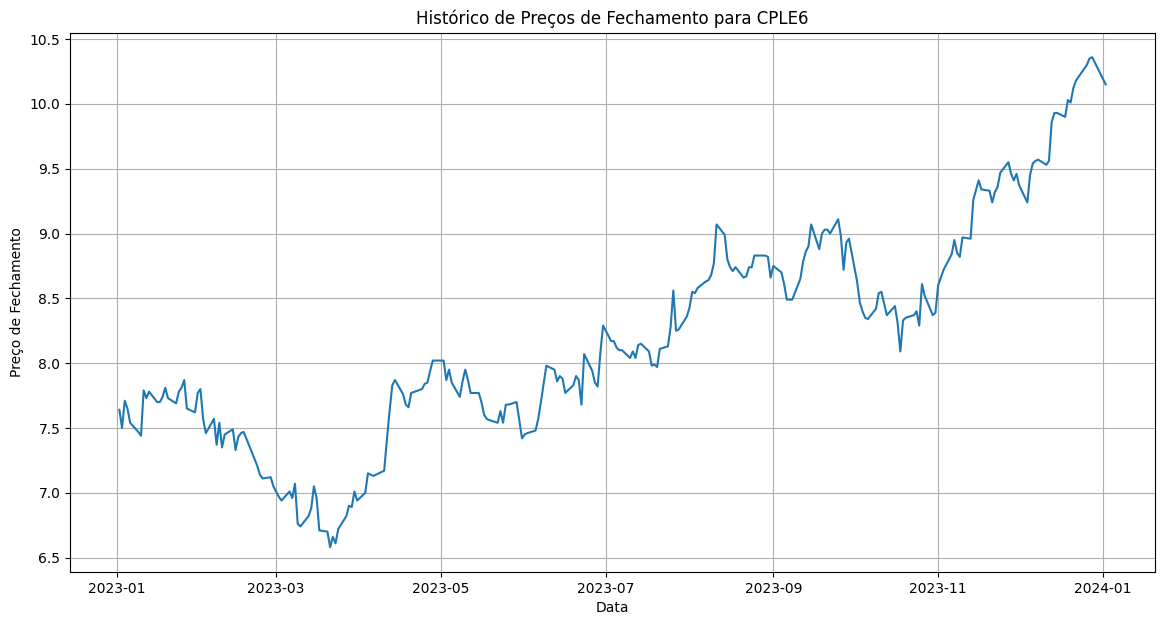

UNIP6
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-02  88.150002  88.489998  83.779999  85.690002  82.969101  220900
2023-01-03  85.699997  86.279999  83.500000  83.830002  81.168159  185200
2023-01-04  84.180000  84.660004  82.250000  82.589996  79.967537  227500
2023-01-05  83.099998  84.040001  81.320000  81.720001  79.125160  222800
2023-01-06  81.889999  82.860001  80.010002  80.010002  77.469460  365700
...               ...        ...        ...        ...        ...     ...
2023-12-22  75.870003  76.650002  75.470001  75.949997  75.949997  105300
2023-12-26  75.940002  76.599998  75.400002  76.529999  76.529999  171500
2023-12-27  76.589996  76.889999  75.849998  76.500000  76.500000  174700
2023-12-28  76.400002  76.680000  75.519997  76.589996  76.589996  214200
2024-01-02  76.489998  76.779999  75.220001  75.419998  75.419998  265400

[249 rows x 6 columns]

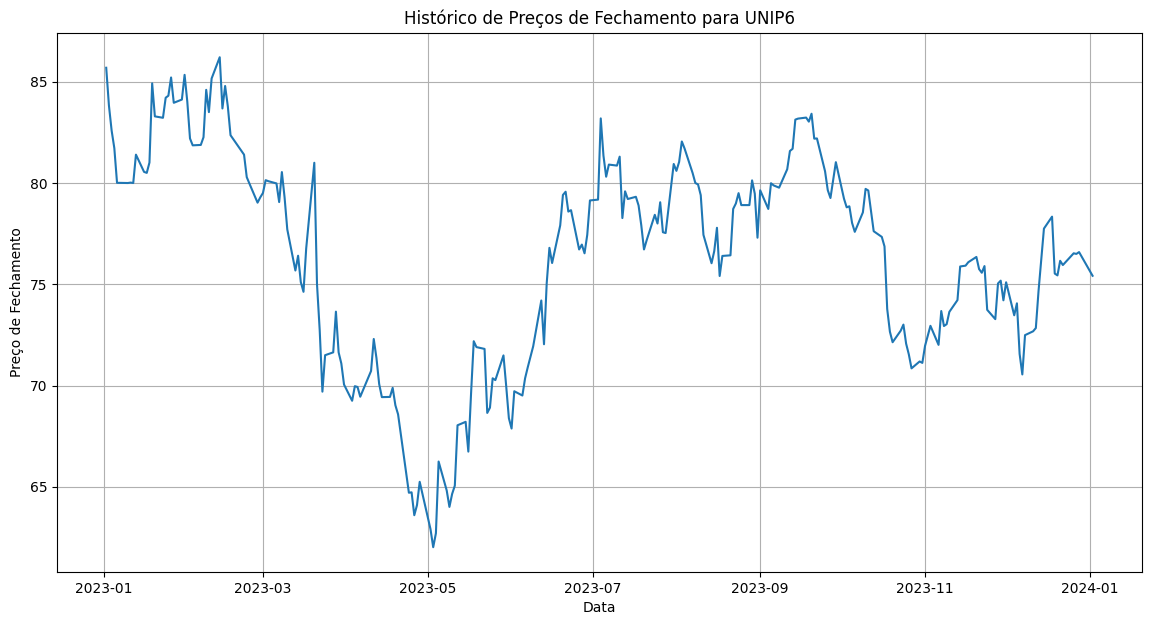

KLBN11
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  19.980000  20.129999  19.670000  20.049999  18.792383  1816600
2023-01-03  20.049999  20.340000  19.799999  20.240000  18.970467  4439800
2023-01-04  20.190001  20.700001  20.150000  20.320000  19.045448  4412900
2023-01-05  20.430000  20.780001  20.219999  20.469999  19.186041  4614600
2023-01-06  20.639999  20.670000  20.160000  20.320000  19.045448  3071500
...               ...        ...        ...        ...        ...      ...
2023-12-22  21.730000  21.930000  21.620001  21.900000  21.900000  4255500
2023-12-26  21.980000  22.059999  21.860001  21.870001  21.870001  2172400
2023-12-27  21.870001  22.080000  21.750000  21.959999  21.959999  2707600
2023-12-28  21.910000  22.219999  21.910000  22.219999  22.219999  3678700
2024-01-02  22.209999  22.299999  21.730000  21.730000  21.730000  4377100

[248 rows x 6 columns]

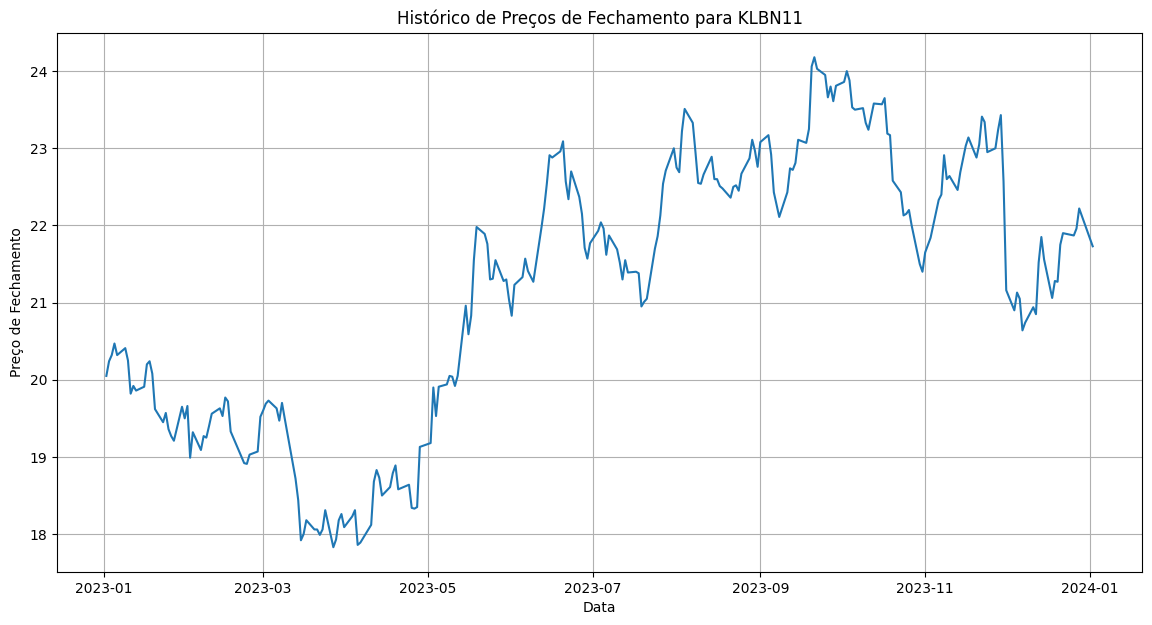

CMIN3
[*********************100%%**********************]  1 of 1 completed


Open  High   Low  Close  Adj Close    Volume
Date                                                    
2023-01-02  4.10  4.10  3.97   4.04   3.500889   4162100
2023-01-03  4.03  4.09  3.96   3.99   3.457561   8068500
2023-01-04  4.02  4.03  3.91   3.98   3.448896   7613500
2023-01-05  4.00  4.08  3.90   4.05   3.509555  11753600
2023-01-06  4.10  4.35  4.10   4.30   3.726194  19131500
...          ...   ...   ...    ...        ...       ...
2023-12-22  7.41  7.55  7.27   7.42   7.344808   5260600
2023-12-26  7.45  7.70  7.43   7.63   7.552680   6301000
2023-12-27  7.63  7.96  7.62   7.83   7.750653   8052400
2023-12-28  7.80  7.95  7.71   7.83   7.750653   5803100
2024-01-02  7.80  7.96  7.75   7.89   7.890000   7861400

[249 rows x 6 columns]

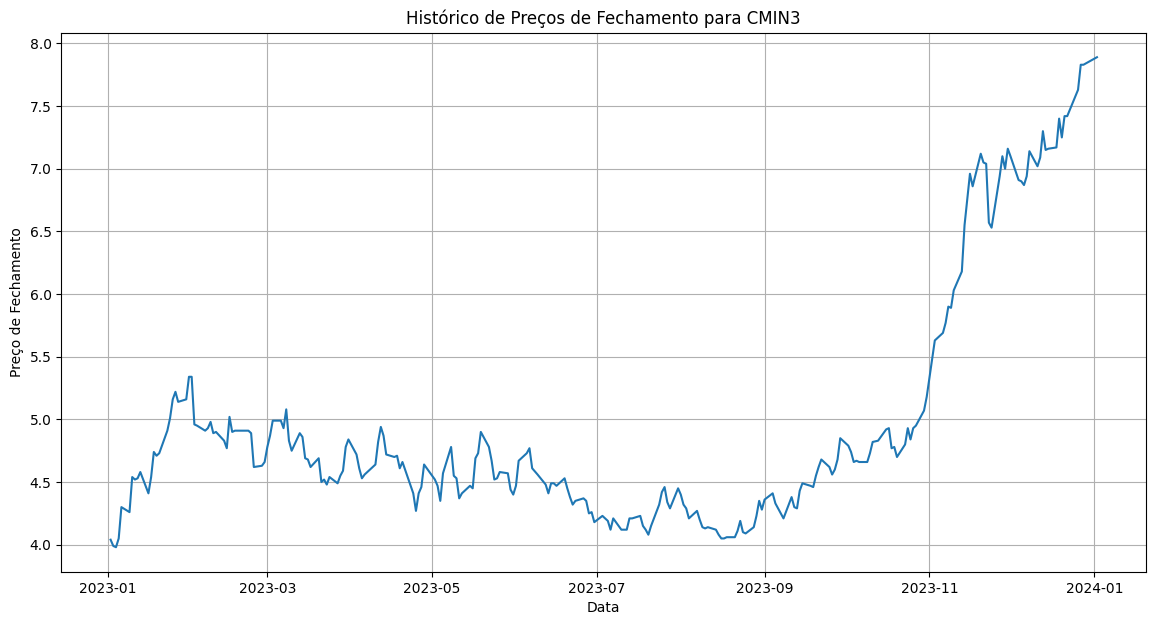

WEGE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  38.500000  38.500000  37.740002  38.099998  37.490429  3017700
2023-01-03  38.110001  38.369999  36.889999  37.150002  36.555630  5662900
2023-01-04  37.330002  37.689999  36.660000  37.400002  36.801632  6169800
2023-01-05  37.590000  37.900002  37.259998  37.480000  36.880348  6660600
2023-01-06  37.490002  38.270000  37.299999  38.029999  37.421543  4071700
...               ...        ...        ...        ...        ...      ...
2023-12-22  36.389999  36.549999  36.169998  36.509998  36.509998  4733200
2023-12-26  36.570000  36.919998  36.450001  36.720001  36.720001  3173100
2023-12-27  36.720001  36.990002  36.509998  36.840000  36.840000  2730800
2023-12-28  36.840000  37.220001  36.709999  36.910000  36.910000  3536300
2024-01-02  36.910000  37.049999  36.330002  36.570000  36.570000  3991200

[249 rows x 6 columns]

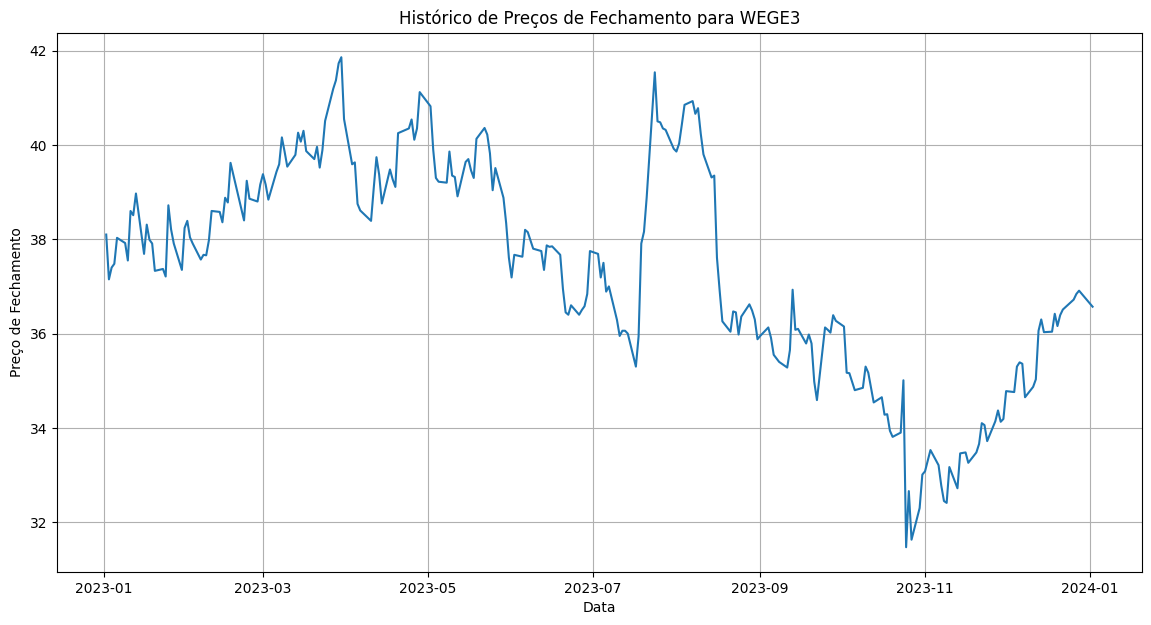

RANI3
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2023-01-02   8.01   8.01   7.72   7.81   7.118737   853000
2023-01-03   7.83   7.92   7.71   7.73   7.045817  1232000
2023-01-04   7.81   7.82   7.65   7.70   7.018473   685100
2023-01-05   7.71   7.87   7.71   7.85   7.155196   565100
2023-01-06   7.85   7.95   7.78   7.88   7.182541   699100
...           ...    ...    ...    ...        ...      ...
2023-12-22  10.93  11.08  10.85  10.97  10.970000   676400
2023-12-26  11.00  11.06  10.79  10.79  10.790000   645100
2023-12-27  10.82  11.00  10.71  10.81  10.810000  1196900
2023-12-28  10.84  10.98  10.78  10.92  10.920000   732800
2024-01-02  10.95  10.95  10.59  10.59  10.590000  1131700

[249 rows x 6 columns]

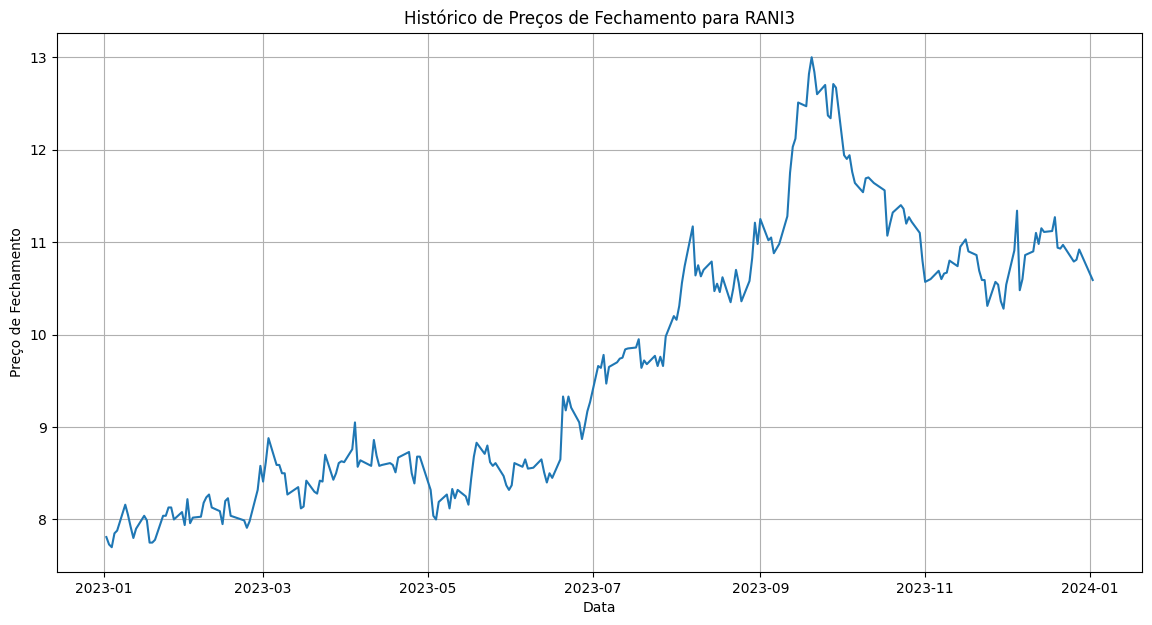

AURE3
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2023-01-02  14.54  14.64  14.27  14.48  11.784715  1018800
2023-01-03  14.43  14.46  14.12  14.22  11.573112  1562800
2023-01-04  14.26  14.50  14.00  14.50  11.800992  2937400
2023-01-05  14.44  14.57  14.15  14.57  11.857962  4358300
2023-01-06  14.57  14.73  14.45  14.58  11.866100  2864500
...           ...    ...    ...    ...        ...      ...
2023-12-22  13.33  13.35  13.25  13.33  13.330000  2899500
2023-12-26  13.35  13.38  13.26  13.32  13.320000  3358500
2023-12-27  13.32  13.39  13.25  13.39  13.390000  3456400
2023-12-28  13.39  13.39  13.26  13.31  13.310000  3487000
2024-01-02  13.31  13.41  13.22  13.30  13.300000  5209500

[249 rows x 6 columns]

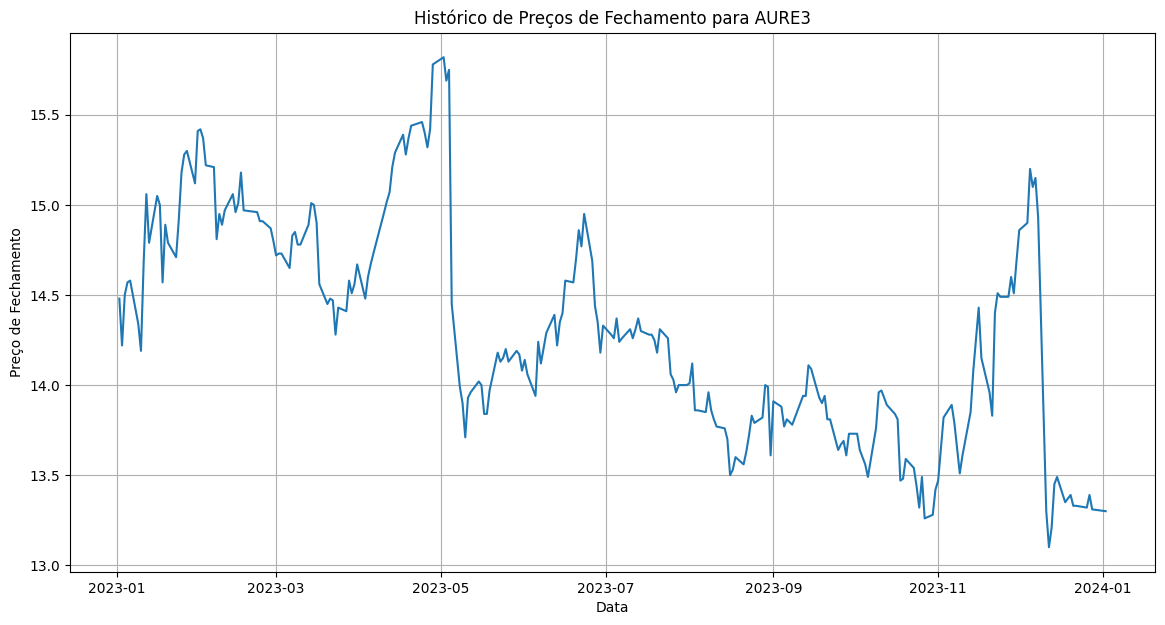

AGRO3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-02  29.959999  30.090000  28.600000  29.110001  26.011539  357300
2023-01-03  29.120001  29.379999  28.260000  28.290001  25.278820  441100
2023-01-04  28.410000  28.530001  27.450001  27.660000  24.715876  397700
2023-01-05  27.790001  27.920000  27.500000  27.610001  24.671198  308800
2023-01-06  27.580000  28.530001  27.530001  27.820000  24.858845  323200
...               ...        ...        ...        ...        ...     ...
2023-12-22  25.860001  26.170000  25.680000  25.860001  25.860001  243500
2023-12-26  25.860001  26.370001  25.610001  26.250000  26.250000  302600
2023-12-27  26.280001  26.559999  25.990000  26.360001  26.360001  285600
2023-12-28  26.360001  26.709999  26.200001  26.709999  26.709999  457500
2024-01-02  26.580000  26.620001  25.930000  26.040001  26.040001  492200

[249 rows x 6 columns]

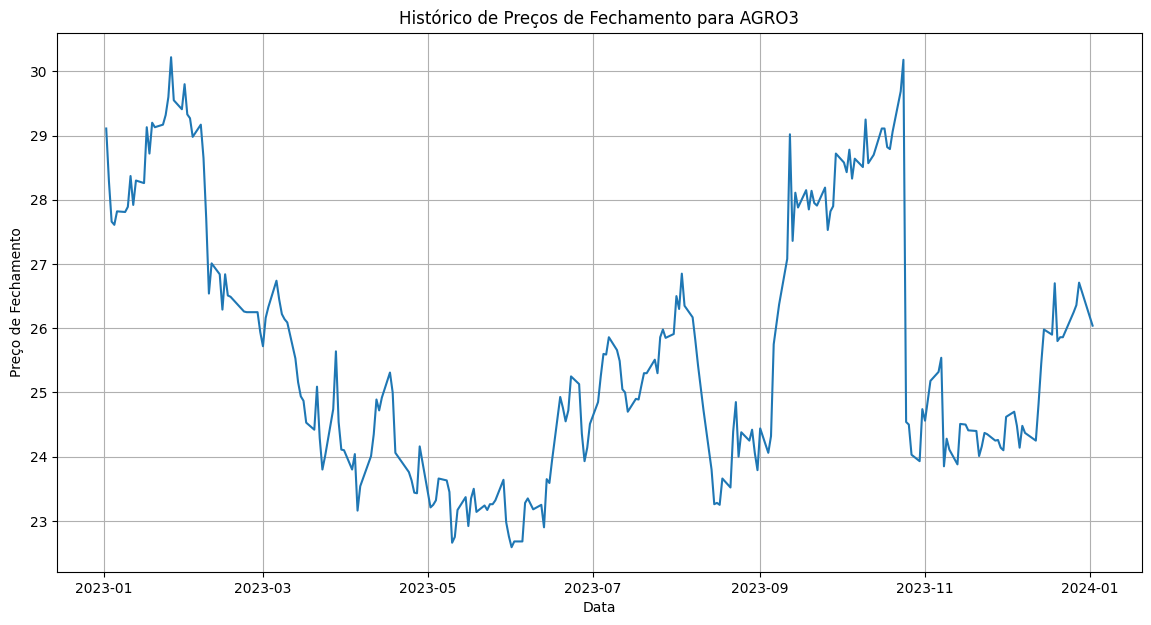

BBDC3
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-01-02  13.47  13.47  13.09  13.19  11.945462   4974100
2023-01-03  13.15  13.18  12.52  12.55  11.380734  17655900
2023-01-04  12.66  12.76  12.41  12.66  11.480485  15164000
2023-01-05  12.74  13.16  12.65  13.07  11.852285  12525700
2023-01-06  13.07  13.45  13.07  13.42  12.169676   9496600
...           ...    ...    ...    ...        ...       ...
2023-12-22  14.92  15.17  14.81  15.05  15.032819   5660600
2023-12-26  15.05  15.17  15.01  15.11  15.092750   2428700
2023-12-27  15.08  15.32  15.03  15.22  15.202625   2495300
2023-12-28  15.24  15.36  15.21  15.28  15.262556   3375400
2024-01-02  15.26  15.26  14.98  15.11  15.092750   4545600

[249 rows x 6 columns]

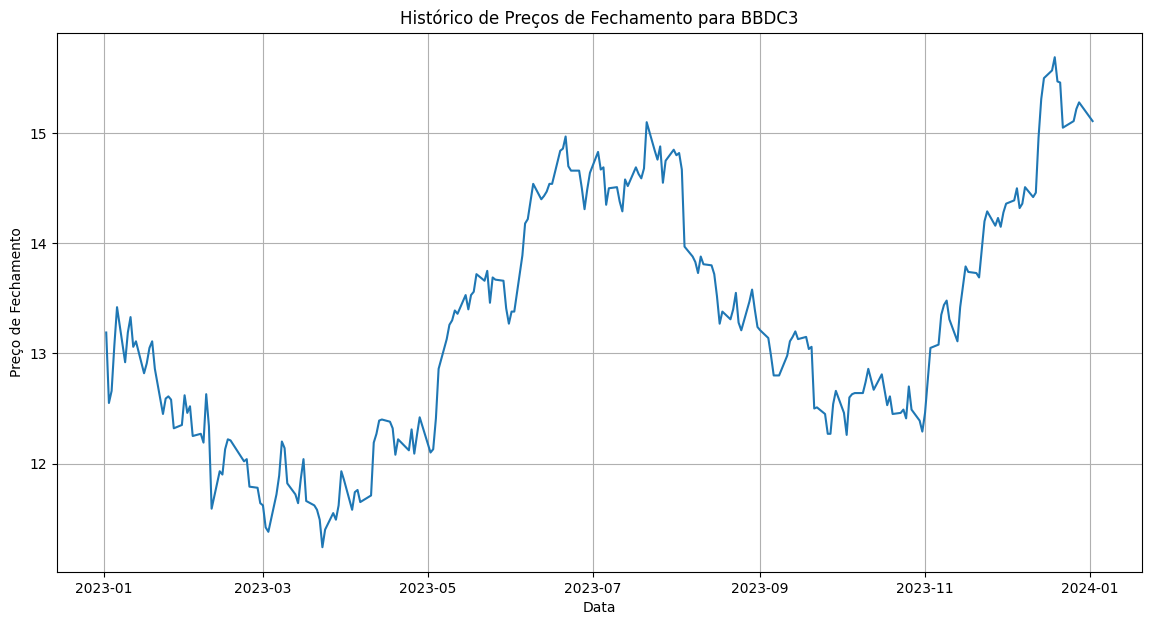

CSMG3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  15.710000  15.710000  15.030000  15.290000  13.035645   989000
2023-01-03  15.260000  15.290000  14.750000  15.070000  12.848081  2183000
2023-01-04  15.110000  15.200000  14.790000  14.920000  12.720199  1214100
2023-01-05  14.990000  15.220000  14.810000  15.220000  12.975967  1200900
2023-01-06  15.220000  15.290000  15.030000  15.250000  13.001544   800100
...               ...        ...        ...        ...        ...      ...
2023-12-22  20.600000  20.709999  20.379999  20.540001  20.540001   669700
2023-12-26  20.530001  20.740000  20.360001  20.360001  20.360001   777600
2023-12-27  20.370001  20.440001  20.160000  20.209999  20.209999   667800
2023-12-28  20.250000  20.500000  20.070000  20.480000  20.480000   837500
2024-01-02  20.490000  20.680000  20.100000  20.200001  20.200001  1274500

[249 rows x 6 columns]

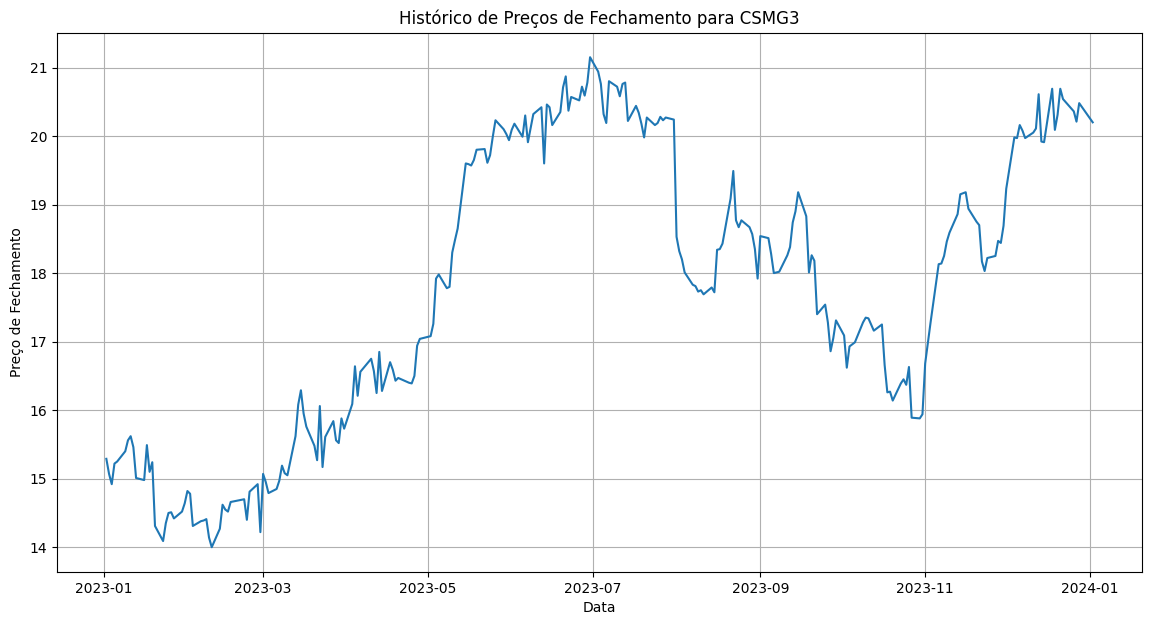

SAPR11
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  17.350000  17.350000  16.709999  16.860001  15.824888   726200
2023-01-03  16.950001  17.139999  16.559999  16.559999  15.543306   808800
2023-01-04  16.480000  16.980000  16.440001  16.700001  15.674712   709300
2023-01-05  16.719999  16.940001  16.600000  16.889999  15.853046   502300
2023-01-06  17.000000  17.070000  16.820000  16.990000  15.946906   572000
...               ...        ...        ...        ...        ...      ...
2023-12-22  29.090000  29.370001  28.870001  29.209999  28.594782   698600
2023-12-26  29.209999  29.360001  28.730000  28.750000  28.144472   701900
2023-12-27  28.760000  28.959999  28.580000  28.870001  28.261946   980000
2023-12-28  28.860001  29.190001  28.840000  29.190001  28.575205   798000
2024-01-02  28.740000  28.740000  28.000000  28.299999  28.299999  1132000

[248 rows x 6 columns]

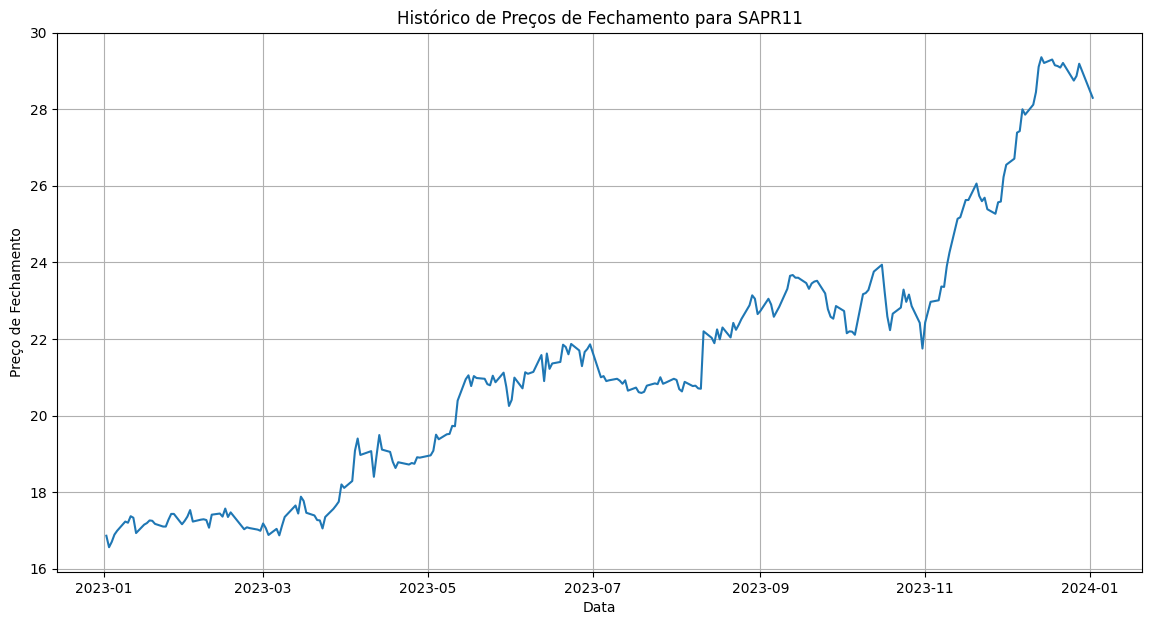

AESB3
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2023-01-02   9.65   9.67   9.46   9.50       9.50  1793300
2023-01-03   9.50   9.59   9.22   9.22       9.22  1882800
2023-01-04   9.26   9.32   9.15   9.26       9.26  1839100
2023-01-05   9.30   9.37   9.19   9.24       9.24  1866700
2023-01-06   9.26   9.33   9.22   9.26       9.26  1966000
...           ...    ...    ...    ...        ...      ...
2023-12-22  12.50  12.62  12.44  12.54      12.54   996900
2023-12-26  12.53  12.59  12.46  12.48      12.48  1281500
2023-12-27  12.42  12.65  12.39  12.65      12.65  1239600
2023-12-28  12.64  12.65  12.28  12.32      12.32  2696700
2024-01-02  12.32  12.32  11.88  11.95      11.95  3543200

[249 rows x 6 columns]

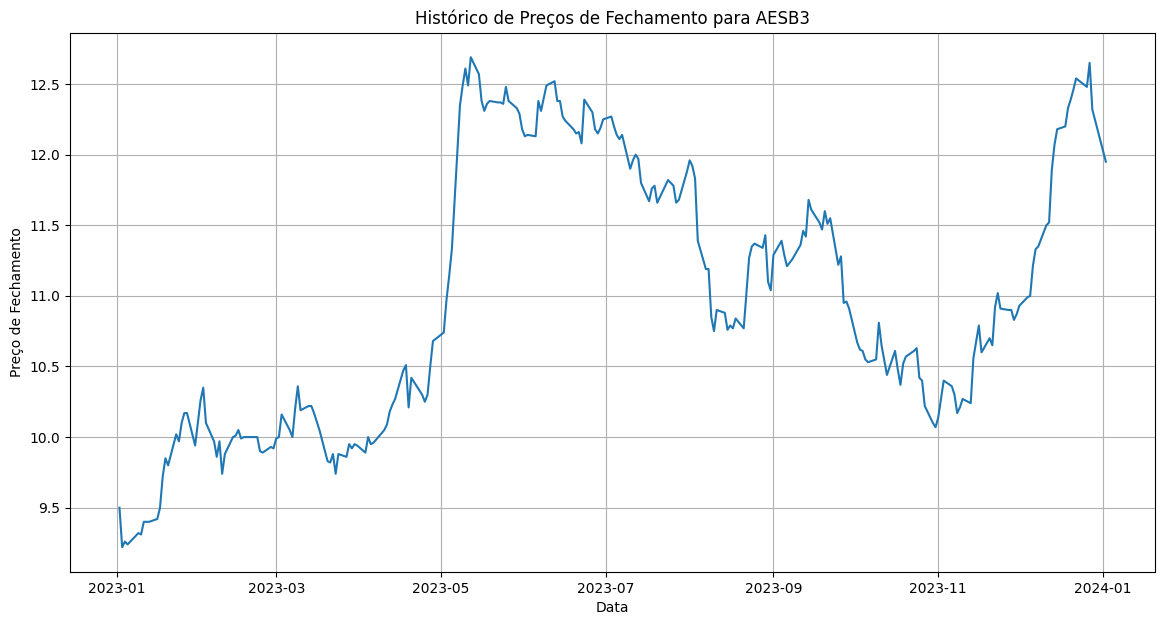

EGIE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  37.830002  37.830002  36.980000  37.320000  34.845306   927300
2023-01-03  37.240002  37.509998  36.619999  36.980000  34.527847  2025700
2023-01-04  37.130001  37.209999  36.669998  37.000000  34.546524  1456300
2023-01-05  37.160000  37.160000  36.439999  36.759998  34.322437  1778500
2023-01-06  36.770000  37.020000  36.500000  36.869999  34.425140  1403100
...               ...        ...        ...        ...        ...      ...
2023-12-22  44.599998  44.820000  44.270000  44.570000  44.570000   960400
2023-12-26  44.570000  44.980000  44.549999  44.790001  44.790001   951900
2023-12-27  44.840000  45.240002  44.580002  45.240002  45.240002   741800
2023-12-28  45.240002  45.439999  45.099998  45.330002  45.330002   925200
2024-01-02  44.700001  44.869999  44.299999  44.520000  44.520000  1479200

[249 rows x 6 columns]

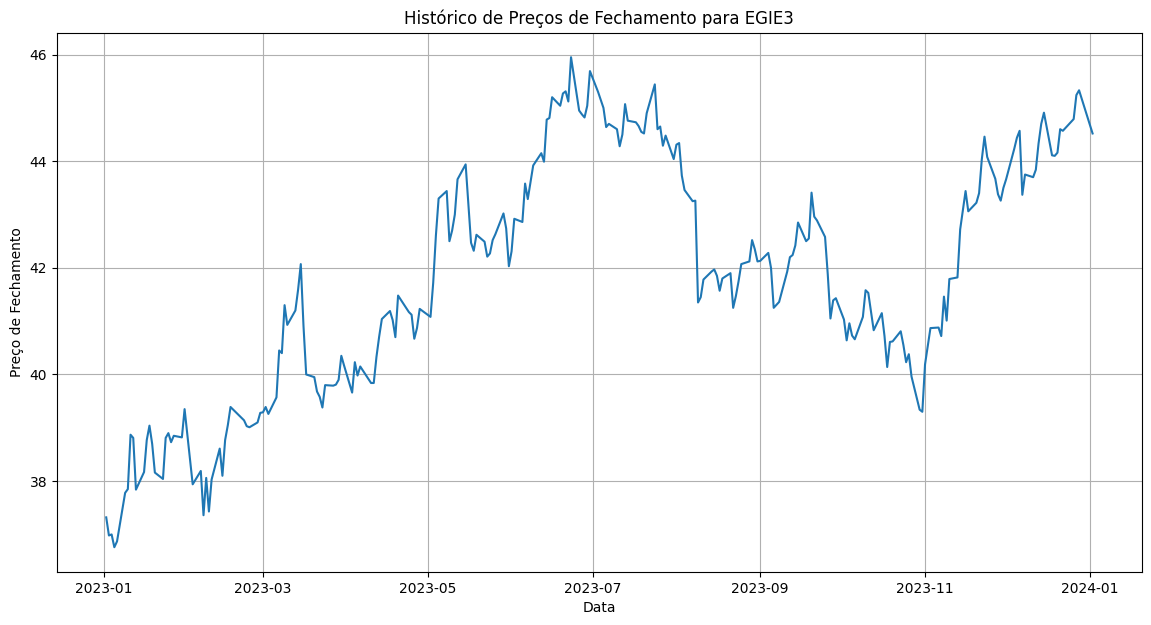

ABCB4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  19.330000  19.330000  18.420000  18.590000  17.235914   509700
2023-01-03  18.549999  18.680000  17.780001  17.850000  16.549816   922200
2023-01-04  17.900000  18.180000  17.820000  17.910000  16.605446   549900
2023-01-05  18.020000  19.080000  18.020000  18.930000  17.551151  1096800
2023-01-06  18.940001  19.170000  18.760000  18.980000  17.597507   656100
...               ...        ...        ...        ...        ...      ...
2023-12-22  23.980000  24.120001  23.830000  23.870001  23.158081   346600
2023-12-26  24.090904  24.299271  23.813086  23.922230  23.208752   658831
2023-12-27  24.011528  24.418335  23.912308  24.200048  23.478285   541013
2023-12-28  24.200048  24.844986  24.090904  24.844986  24.103987   699346
2024-01-02  23.980000  23.980000  22.790001  22.879999  22.879999  1944700

[249 rows x 6 columns]

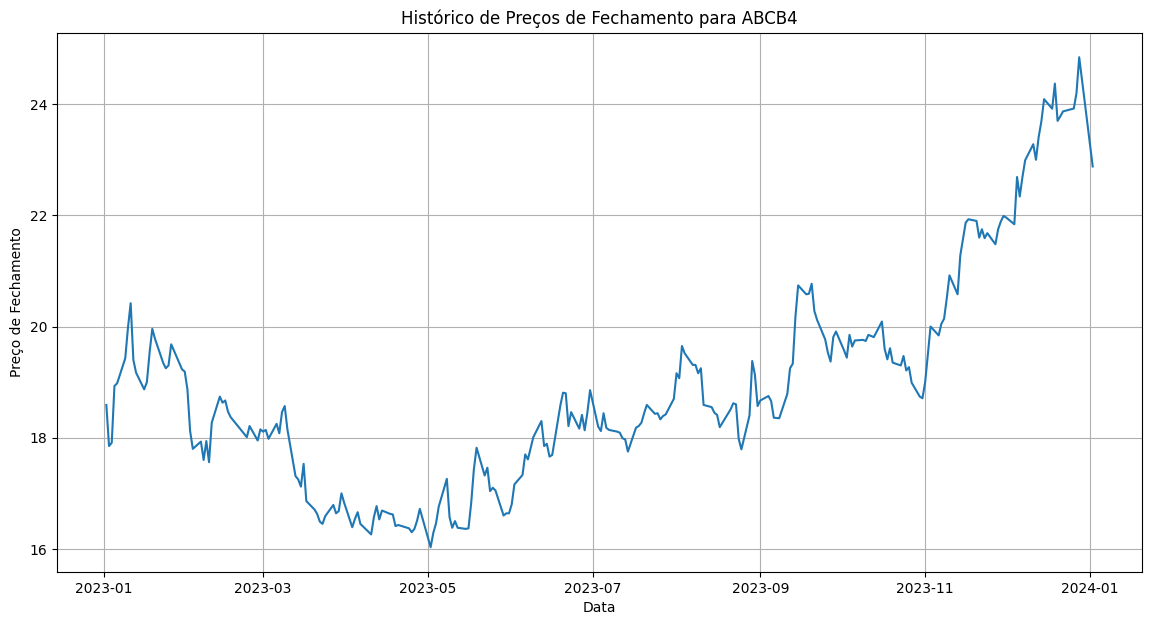

KEPL3
[*********************100%%**********************]  1 of 1 completed


Open    High     Low   Close  Adj Close   Volume
Date                                                          
2023-01-02  10.095  10.135   9.530   9.765   8.938494   845200
2023-01-03   9.700   9.830   9.600   9.670   8.851535   940800
2023-01-04   9.770   9.770   9.375   9.425   8.627272   955600
2023-01-05   9.485   9.595   9.095   9.475   8.673039  1431400
2023-01-06   9.490   9.665   9.425   9.530   8.723384  1448800
...            ...     ...     ...     ...        ...      ...
2023-12-22  10.980  11.020  10.800  10.950  10.950000   948600
2023-12-26  10.940  11.000  10.880  10.950  10.950000  1276900
2023-12-27  10.920  10.980  10.860  10.930  10.930000  1176000
2023-12-28  10.920  10.950  10.760  10.930  10.930000  1694600
2024-01-02  10.930  10.970  10.550  10.550  10.550000  1403100

[249 rows x 6 columns]

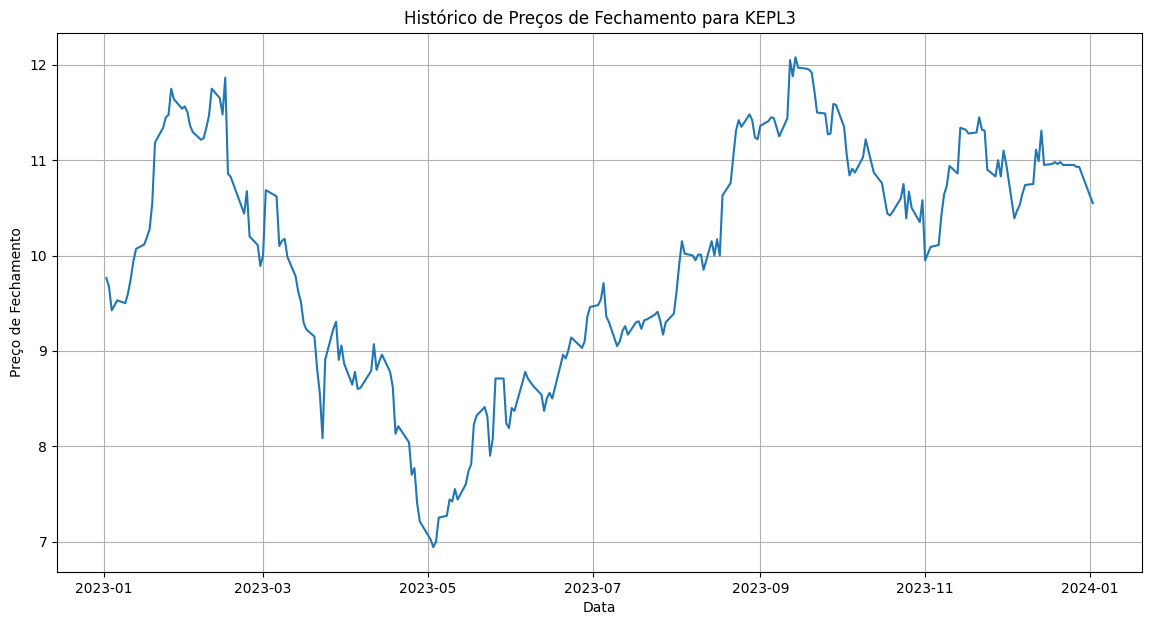

MRFG3
[*********************100%%**********************]  1 of 1 completed


Open  High   Low  Close  Adj Close    Volume
Date                                                    
2023-01-02  8.67  8.69  8.24   8.36       8.36   5620500
2023-01-03  8.35  8.46  8.14   8.19       8.19  11517500
2023-01-04  8.20  8.35  7.97   8.35       8.35  10294100
2023-01-05  8.38  8.47  8.04   8.47       8.47  15022300
2023-01-06  8.46  8.56  8.30   8.45       8.45  10988500
...          ...   ...   ...    ...        ...       ...
2023-12-22  9.85  9.85  9.61   9.81       9.81   6600700
2023-12-26  9.81  9.96  9.71   9.78       9.78   3611800
2023-12-27  9.75  9.88  9.68   9.77       9.77   3023500
2023-12-28  9.76  9.80  9.60   9.70       9.70   6361100
2024-01-02  9.65  9.75  9.52   9.65       9.65   4588500

[249 rows x 6 columns]

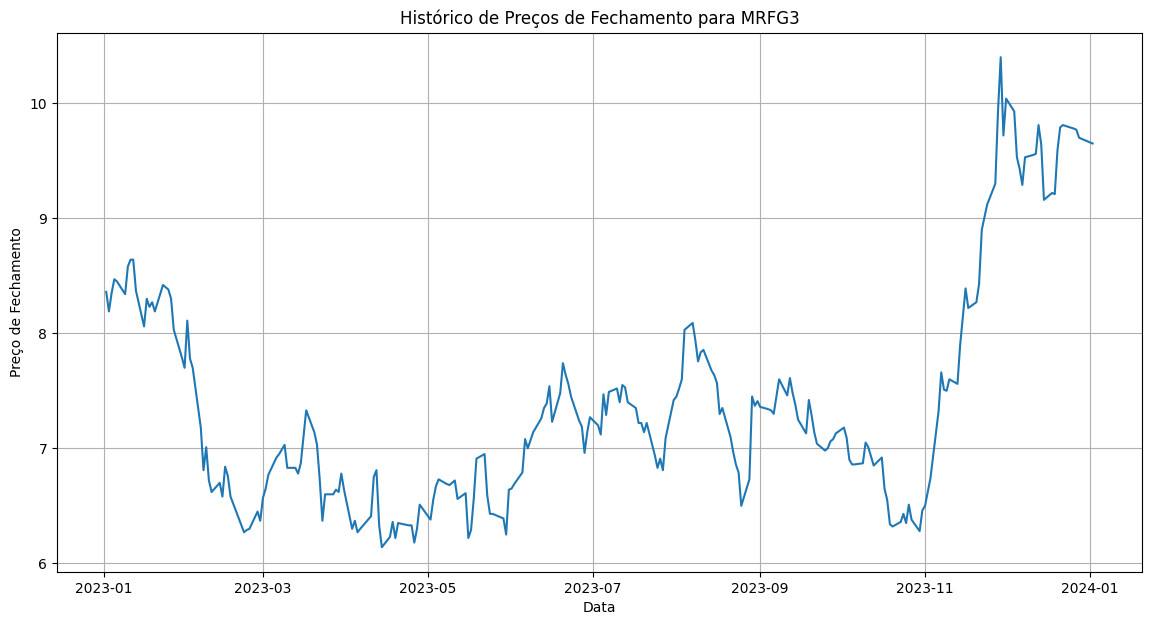

LEVE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  30.059999  30.219999  27.549999  28.330000  22.053732   227300
2023-01-03  28.600000  30.030001  28.129999  29.240000  22.762129   289800
2023-01-04  29.690001  29.840000  28.910000  29.500000  22.964527   150900
2023-01-05  29.209999  30.410000  29.209999  29.889999  23.268127   140100
2023-01-06  30.010000  30.420000  29.510000  29.959999  23.322618   137300
...               ...        ...        ...        ...        ...      ...
2023-12-22  35.020000  35.189999  34.049999  34.849998  34.849998   576500
2023-12-26  34.900002  35.340000  34.680000  35.080002  35.080002   416100
2023-12-27  35.150002  35.259998  34.770000  35.150002  35.150002   428200
2023-12-28  35.150002  35.340000  34.799999  35.340000  35.340000   610400
2024-01-02  35.470001  35.490002  34.250000  34.250000  34.250000  1166800

[249 rows x 6 columns]

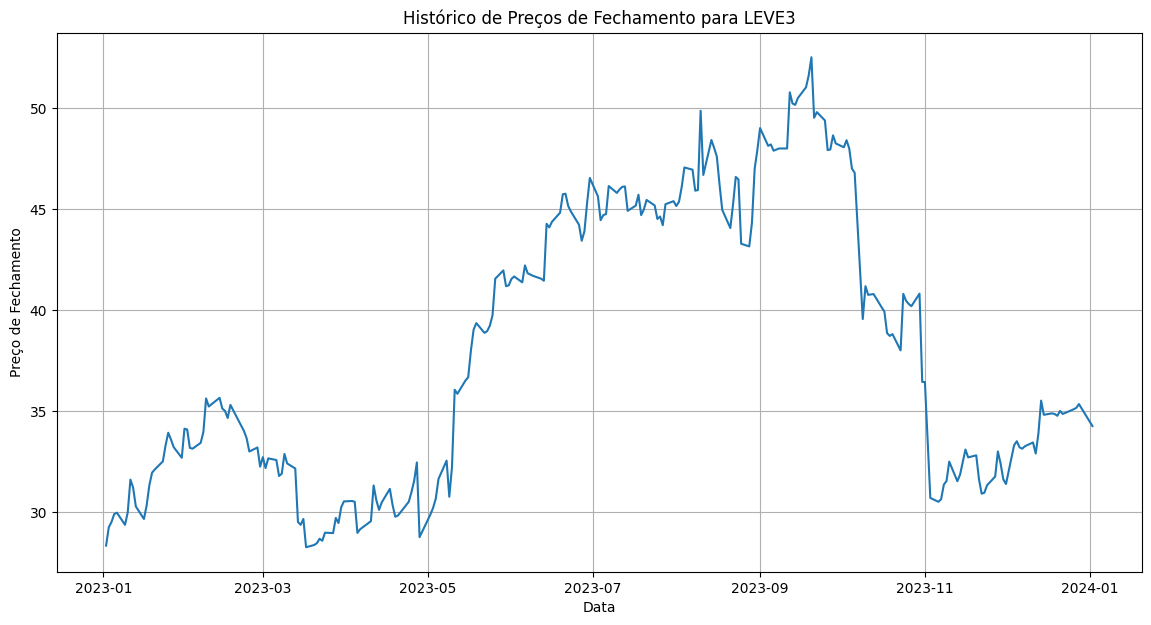

ITUB4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  24.430000  24.530001  24.040001  24.490000  23.388268  23340700
2023-01-03  24.490000  24.650000  23.830000  23.980000  22.901203  29873800
2023-01-04  24.059999  24.520000  23.879999  24.049999  22.968060  29881500
2023-01-05  24.100000  24.910000  24.020000  24.799999  23.684320  36322800
2023-01-06  24.930000  25.309999  24.799999  25.230000  24.094975  37628200
...               ...        ...        ...        ...        ...       ...
2023-12-22  32.820000  33.540001  32.799999  33.310001  33.292694  32650500
2023-12-26  33.369999  33.779999  33.230000  33.650002  33.632519  23135400
2023-12-27  33.610001  33.950001  33.570000  33.880001  33.862396  18176500
2023-12-28  33.880001  33.970001  33.740002  33.970001  33.952351  12555300
2024-01-02  33.889999  33.889999  33.240002  33.520000  33.520000  18948200

[249 rows x 6 columns]

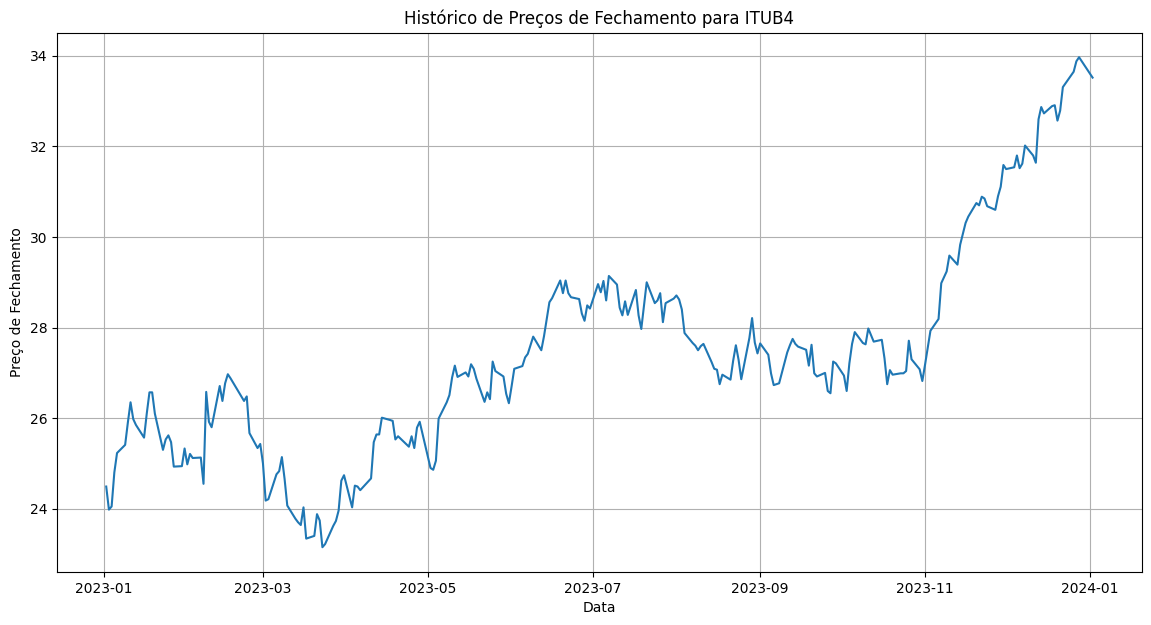

CSAN3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  16.980000  17.080000  16.209999  16.260000  15.367685  8126300
2023-01-03  16.260000  16.389999  15.540000  15.590000  14.734453  7097000
2023-01-04  15.670000  15.890000  15.350000  15.700000  14.838416  7849500
2023-01-05  15.840000  16.110001  15.500000  16.020000  15.140856  8362000
2023-01-06  16.049999  16.600000  16.000000  16.580000  15.670123  6936800
...               ...        ...        ...        ...        ...      ...
2023-12-22  19.090000  19.299999  18.959999  19.190001  19.190001  6012500
2023-12-26  19.230000  19.410000  19.070000  19.250000  19.250000  5582500
2023-12-27  19.250000  19.600000  19.100000  19.540001  19.540001  7417700
2023-12-28  19.580000  19.639999  19.360001  19.360001  19.360001  3669000
2024-01-02  19.379999  19.480000  19.049999  19.219999  19.219999  5096300

[249 rows x 6 columns]

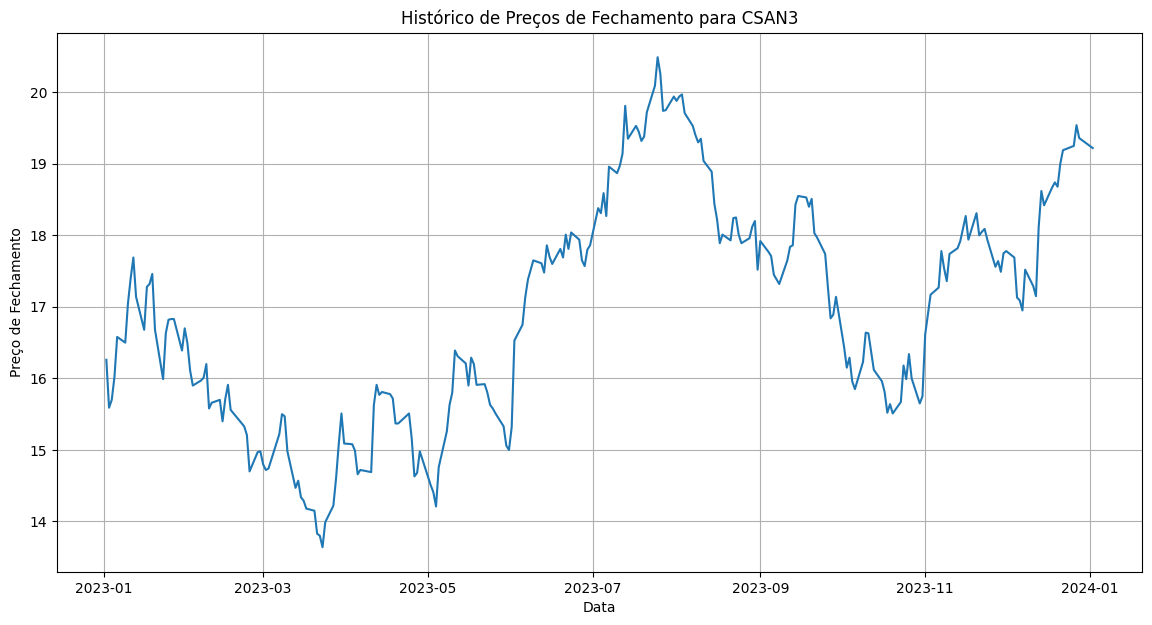

SANB11
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  28.100000  28.110001  27.530001  27.629999  26.022139   696900
2023-01-03  27.660000  27.910000  27.360001  27.510000  25.909124   888200
2023-01-04  27.500000  28.410000  27.469999  28.070000  26.436537  1466300
2023-01-05  28.250000  28.660000  27.930000  28.520000  26.860350  3032400
2023-01-06  28.590000  29.340000  28.459999  29.260000  27.557287  1853800
...               ...        ...        ...        ...        ...      ...
2023-12-22  31.389999  31.959999  31.360001  31.540001  31.540001  1518700
2023-12-26  31.549999  31.870001  31.540001  31.700001  31.700001   768800
2023-12-27  31.700001  32.189999  31.559999  32.080002  32.080002  1021000
2023-12-28  32.230000  32.299999  31.950001  32.299999  32.299999  1103000
2024-01-02  32.290001  32.290001  31.760000  32.049999  32.049999  1714900

[248 rows x 6 columns]

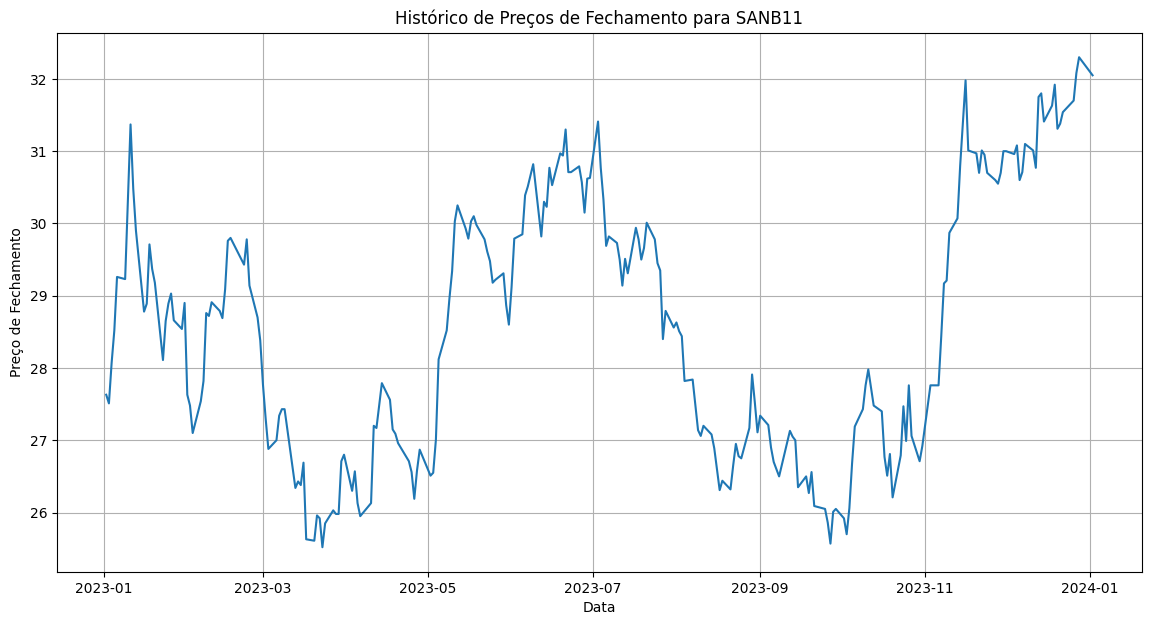

B3SA3
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-01-02  12.79  13.04  12.07  12.25  11.856250  36463300
2023-01-03  12.19  12.44  11.64  11.84  11.459428  55579600
2023-01-04  12.10  12.27  11.77  11.93  11.546535  46600300
2023-01-05  12.03  12.38  11.92  12.30  11.904642  42701200
2023-01-06  12.25  12.74  12.24  12.59  12.185320  18701800
...           ...    ...    ...    ...        ...       ...
2023-12-22  14.49  14.65  14.38  14.51  14.409758  28239600
2023-12-26  14.58  14.74  14.52  14.66  14.558721  10881600
2023-12-27  14.61  14.73  14.47  14.58  14.479274  16243800
2023-12-28  14.52  14.67  14.45  14.55  14.449481  20491200
2024-01-02  14.31  14.40  14.02  14.17  14.170000  30729000

[249 rows x 6 columns]

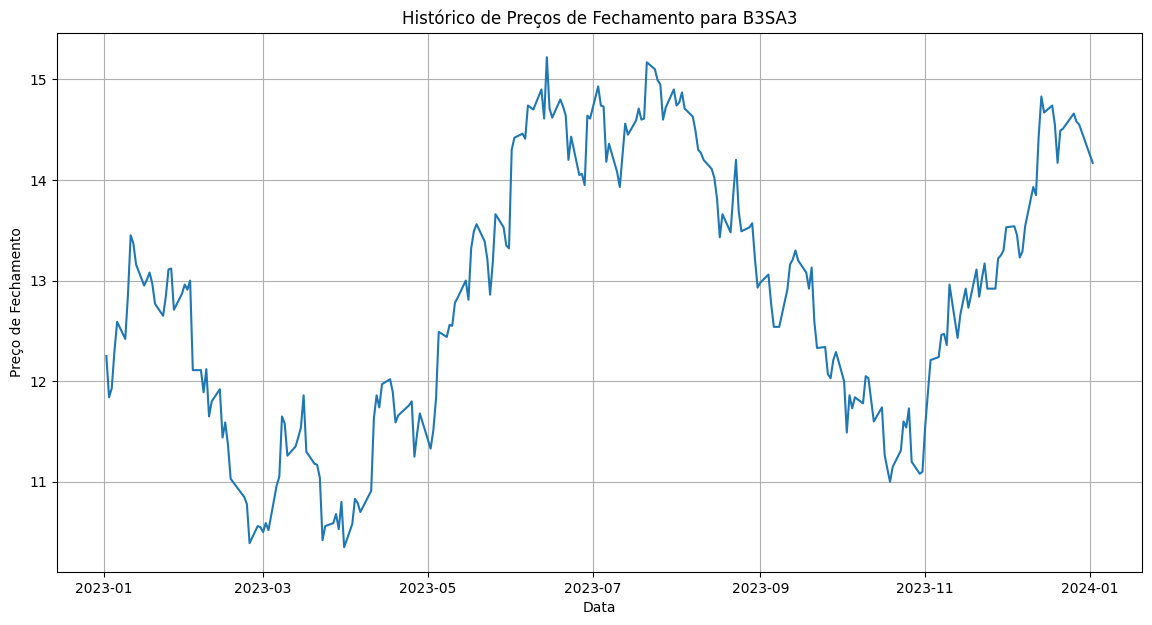

GGBR3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-02  23.342857  23.485714  22.961905  23.447618  21.343454   28560
2023-01-03  23.190475  23.942858  23.142857  23.142857  21.066042   26460
2023-01-04  23.133333  23.171429  22.628571  23.038095  20.970680   22575
2023-01-05  22.866667  24.142857  22.666666  23.980951  21.828926   94815
2023-01-06  23.980951  24.571428  23.790476  23.819048  21.681553   50085
...               ...        ...        ...        ...        ...     ...
2023-12-22  21.100000  21.299999  21.100000  21.150000  21.150000   63300
2023-12-26  21.150000  21.270000  21.030001  21.120001  21.120001   49900
2023-12-27  21.120001  21.299999  21.059999  21.200001  21.200001   50600
2023-12-28  21.209999  21.360001  21.150000  21.360001  21.360001   27000
2024-01-02  21.340000  21.340000  21.070000  21.100000  21.100000   51000

[249 rows x 6 columns]

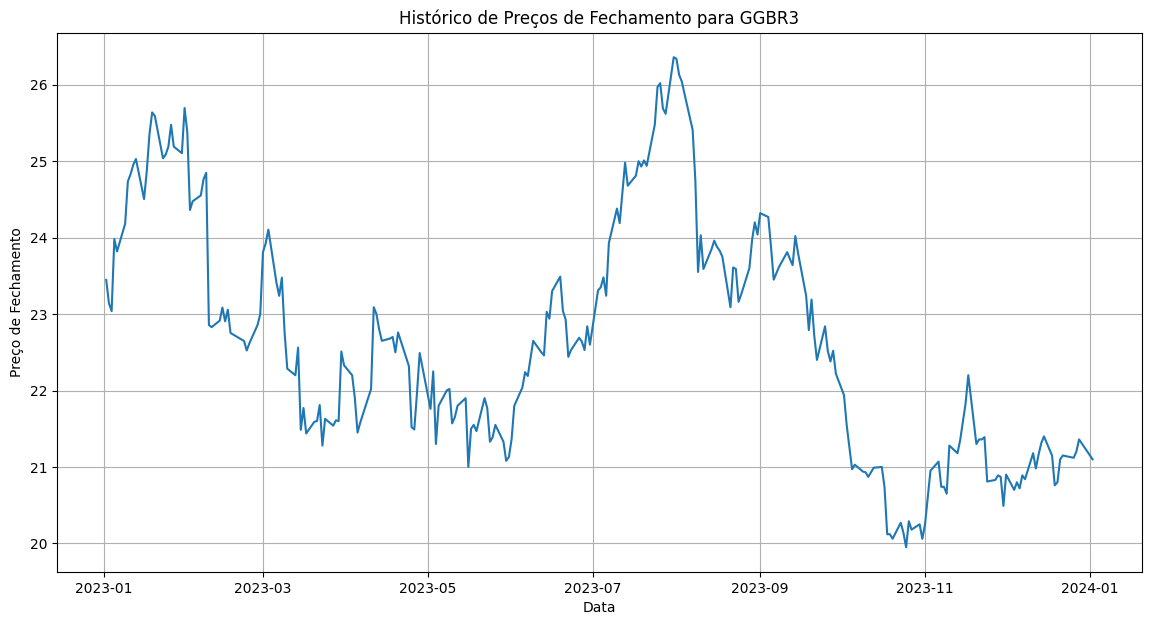

BRAP4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  29.500000  30.059999  29.309999  29.780001  26.407927  2540700
2023-01-03  29.719999  30.209999  29.400000  29.559999  26.212835  2332900
2023-01-04  29.680000  29.930000  29.180000  29.840000  26.461132  3832700
2023-01-05  29.840000  30.680000  29.770000  30.580000  27.117338  3479600
2023-01-06  30.610001  31.110001  30.430000  30.690001  27.214884  3150300
...               ...        ...        ...        ...        ...      ...
2023-12-22  25.500000  25.809999  25.299999  25.430000  25.430000  2425400
2023-12-26  25.650000  25.670000  25.410000  25.500000  25.500000  1500600
2023-12-27  25.500000  25.650000  25.420000  25.620001  25.620001  1811900
2023-12-28  25.590000  25.660000  25.440001  25.660000  25.660000  1056800
2024-01-02  25.709999  25.840000  25.309999  25.410000  25.410000  3148900

[249 rows x 6 columns]

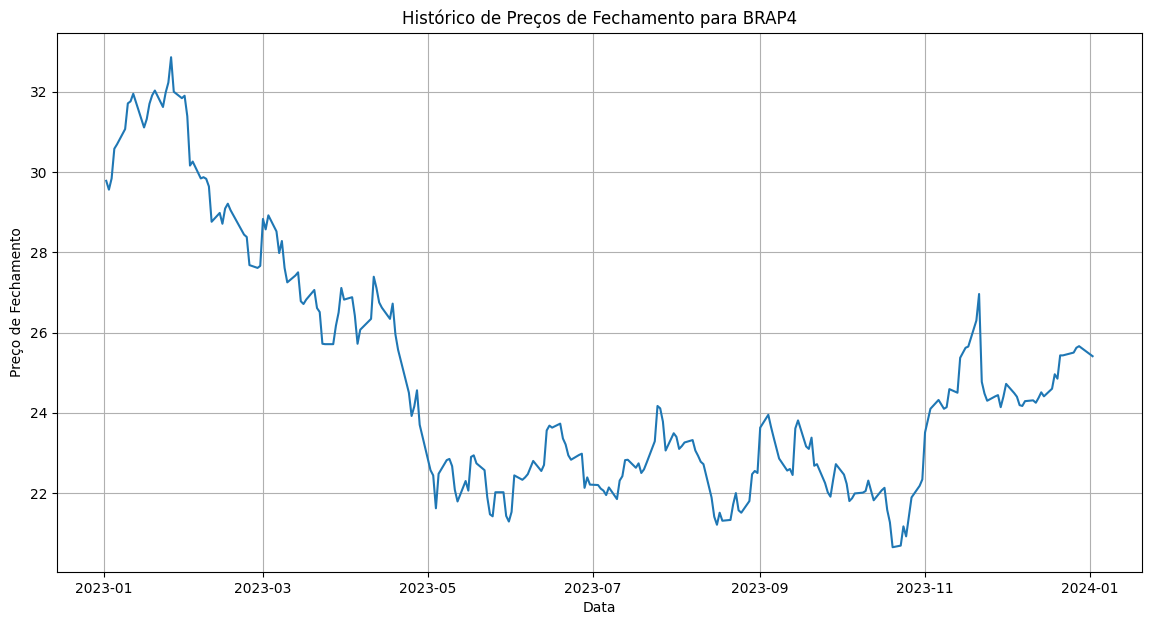

BRSR6
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2023-01-02   9.70   9.70   9.44   9.45   8.743212   799000
2023-01-03   9.47   9.51   9.29   9.30   8.604431  1555300
2023-01-04   9.32   9.46   9.31   9.35   8.650691  1189100
2023-01-05   9.41   9.58   9.38   9.57   8.854237  1064900
2023-01-06   9.59   9.74   9.51   9.58   8.863489  1235900
...           ...    ...    ...    ...        ...      ...
2023-12-22  12.92  13.02  12.82  13.02  13.020000   844100
2023-12-26  13.03  13.15  12.98  13.06  13.060000   719000
2023-12-27  13.06  13.19  12.98  13.19  13.190000   724600
2023-12-28  13.20  13.35  13.10  13.35  13.350000  1127500
2024-01-02  13.30  13.34  12.78  12.83  12.830000  1826800

[249 rows x 6 columns]

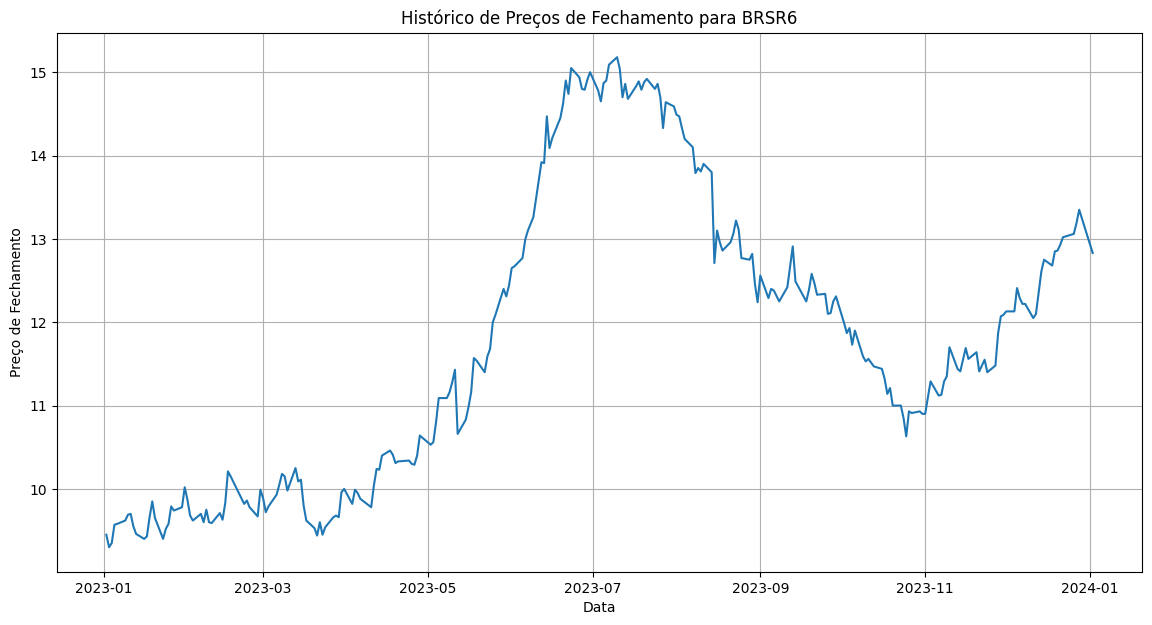

BMGB4
[*********************100%%**********************]  1 of 1 completed


Open  High   Low  Close  Adj Close   Volume
Date                                                   
2023-01-02  2.20  2.21  2.12   2.18   1.939201   915200
2023-01-03  2.19  2.20  2.12   2.12   1.885828   745400
2023-01-04  2.14  2.16  2.08   2.14   1.903619  1465300
2023-01-05  2.16  2.18  2.10   2.18   1.939201  1130300
2023-01-06  2.18  2.23  2.13   2.22   1.974782  1157900
...          ...   ...   ...    ...        ...      ...
2023-12-22  3.23  3.28  2.99   3.10   3.100000  4711300
2023-12-26  3.10  3.28  3.10   3.24   3.240000  2182600
2023-12-27  3.24  3.28  3.21   3.25   3.250000  1084900
2023-12-28  3.26  3.28  3.23   3.27   3.270000   950200
2024-01-02  3.25  3.26  3.12   3.16   3.160000  1023500

[249 rows x 6 columns]

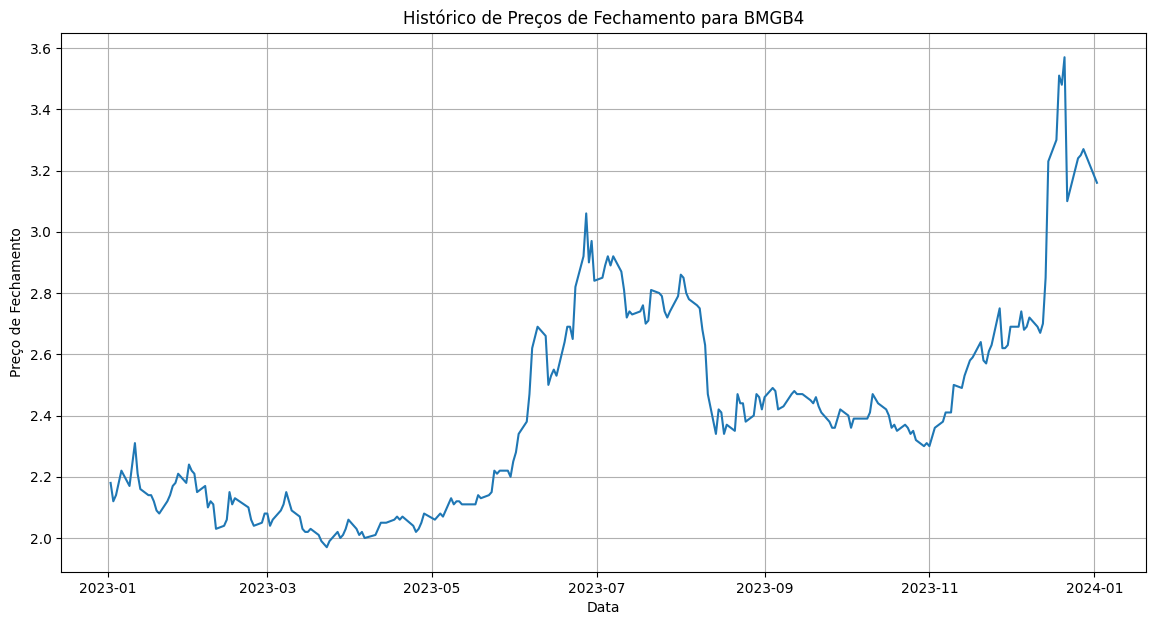

CPFE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  32.720001  32.849998  32.000000  32.189999  29.477486   915500
2023-01-03  32.099998  32.410000  31.639999  31.790001  29.111195  2774500
2023-01-04  31.930000  32.740002  31.790001  32.160000  29.450014  1985300
2023-01-05  32.320000  32.529999  32.000000  32.200001  29.486645  1786900
2023-01-06  32.200001  32.439999  31.620001  31.860001  29.175297  1291000
...               ...        ...        ...        ...        ...      ...
2023-12-22  38.660000  38.880001  38.380001  38.740002  38.740002   905600
2023-12-26  38.959999  38.959999  38.340000  38.610001  38.610001   971300
2023-12-27  38.610001  38.619999  38.209999  38.340000  38.340000  1297200
2023-12-28  38.360001  38.509998  38.139999  38.509998  38.509998  1111700
2024-01-02  38.509998  38.790001  37.970001  38.410000  38.410000  1197800

[249 rows x 6 columns]

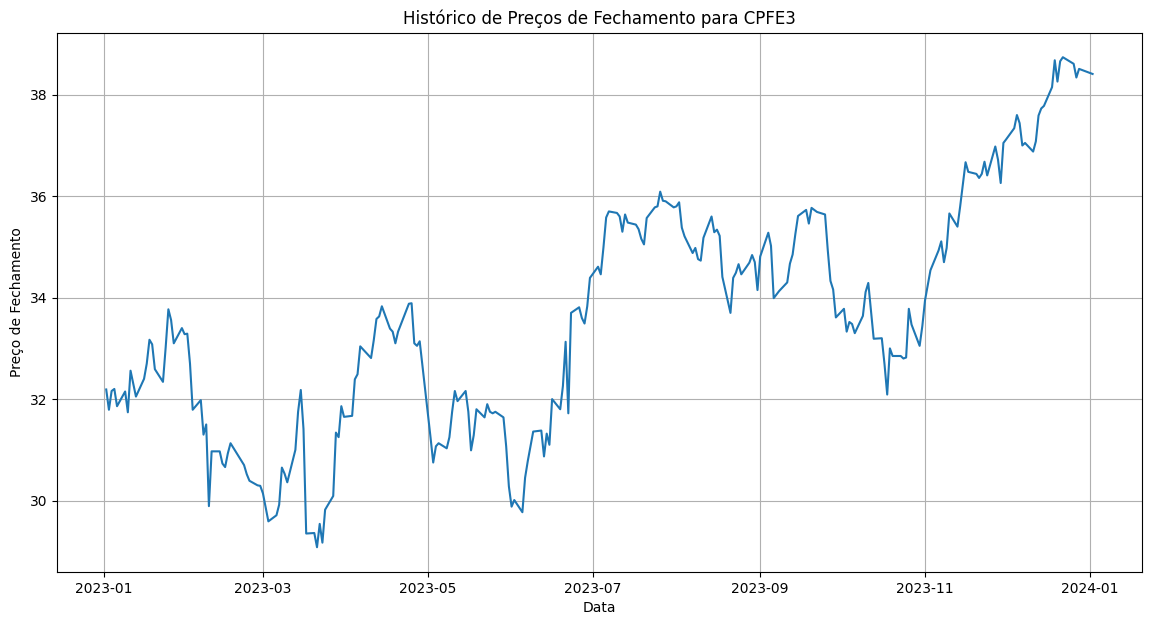

VIVT3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  37.000000  37.340000  36.240002  36.389999  34.708271  1119300
2023-01-03  36.310001  36.549999  35.630001  35.660000  34.012005  2097900
2023-01-04  35.790001  36.830002  35.680000  36.439999  34.755959  2147300
2023-01-05  37.200001  37.630001  36.849998  37.419998  35.690678  3810900
2023-01-06  37.419998  38.419998  37.220001  38.220001  36.453705  2326200
...               ...        ...        ...        ...        ...      ...
2023-12-22  53.090000  53.820000  53.040001  53.580002  53.068233  1102500
2023-12-26  53.570000  53.849998  53.310001  53.849998  53.335651   698500
2023-12-27  53.400002  54.000000  53.310001  53.740002  53.740002  1723200
2023-12-28  53.709999  54.000000  53.349998  53.439999  53.439999  1377500
2024-01-02  53.439999  53.439999  52.310001  52.619999  52.619999  3085200

[249 rows x 6 columns]

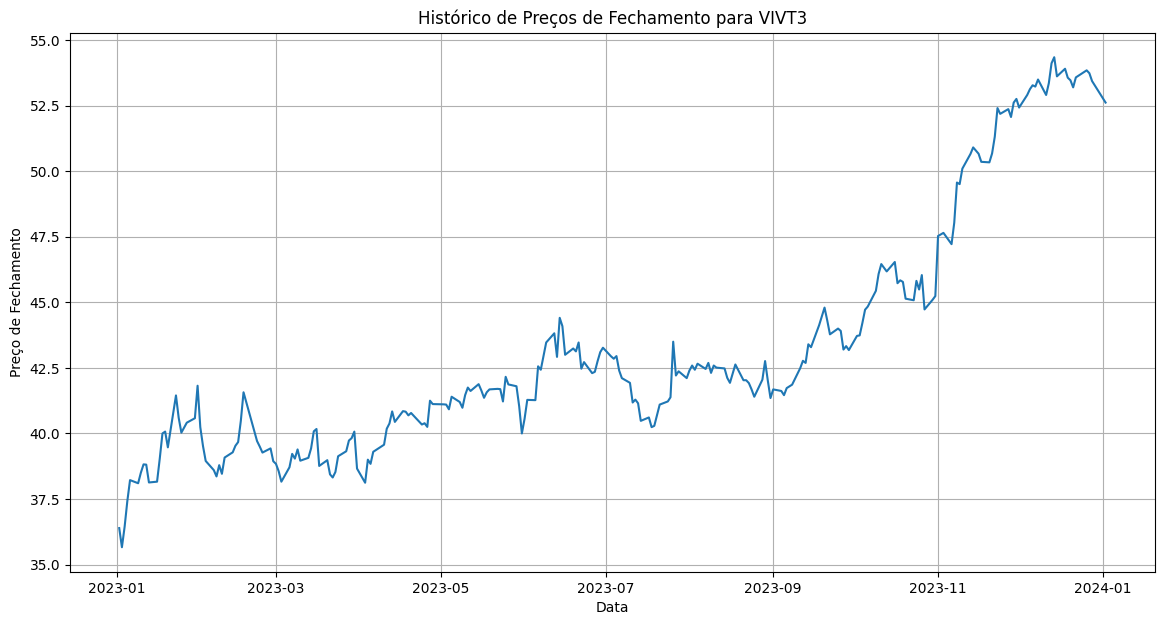

PSSA3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  23.700001  23.700001  22.500000  22.639999  21.537758  2282600
2023-01-03  22.639999  22.840000  22.070000  22.209999  21.128693  1009900
2023-01-04  22.270000  22.770000  22.049999  22.280001  21.195286  1583500
2023-01-05  22.370001  22.600000  22.110001  22.500000  21.404573  1999900
2023-01-06  22.500000  22.879999  22.280001  22.799999  21.689968  1881700
...               ...        ...        ...        ...        ...      ...
2023-12-22  28.620001  29.150000  28.600000  29.049999  28.526089  1312200
2023-12-26  29.049999  29.209999  28.770000  29.000000  28.476992  1075500
2023-12-27  29.049999  29.400000  28.830000  29.400000  28.869778   887000
2023-12-28  28.760000  29.040001  28.690001  28.740000  28.740000   748600
2024-01-02  28.740000  28.740000  28.440001  28.559999  28.559999  1002600

[249 rows x 6 columns]

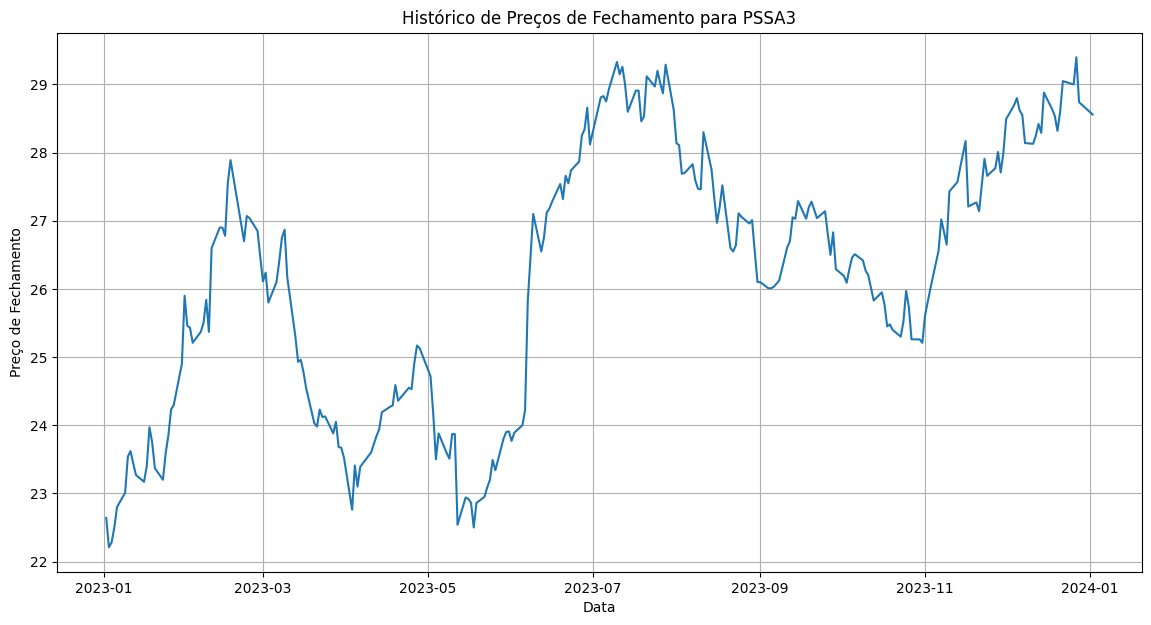

CSNA3
[*********************100%%**********************]  1 of 1 completed


Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2023-01-02  14.550000  14.98  14.250000  14.720000  13.424109  10686500
2023-01-03  14.720000  14.98  14.450000  14.550000  13.269074   8660200
2023-01-04  14.560000  14.68  14.250000  14.660000  13.369390   6661500
2023-01-05  14.710000  15.71  14.380000  15.630000  14.253996  17032900
2023-01-06  15.680000  16.73  15.610000  16.270000  14.837653  15974400
...               ...    ...        ...        ...        ...       ...
2023-12-22  19.129999  19.32  18.860001  19.110001  19.110001   6542100
2023-12-26  19.209999  19.43  19.090000  19.360001  19.360001   3484700
2023-12-27  19.340000  19.68  19.290001  19.510000  19.510000   3860700
2023-12-28  19.400000  19.66  19.400000  19.660000  19.660000   3156500
2024-01-02  19.559999  19.60  19.260000  19.410000  19.410000   4502100

[249 rows x 6 columns]

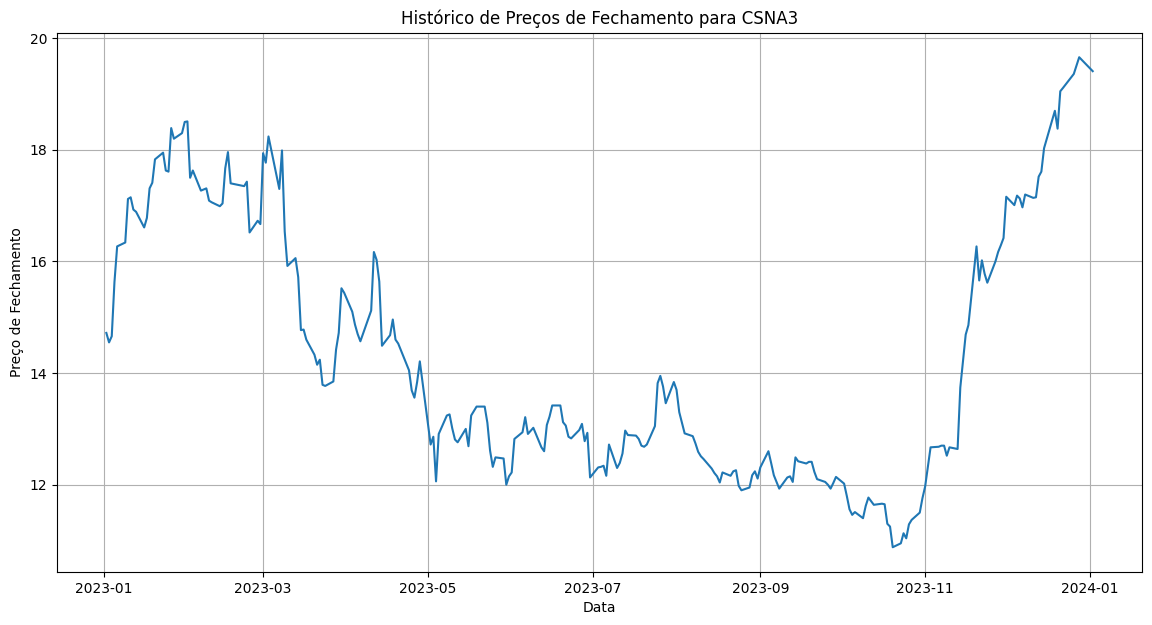

ROMI3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-02  13.836363  13.836363  12.918181  13.363636  12.549425  439560
2023-01-03  13.209090  13.318181  12.645454  13.081818  12.284778  773630
2023-01-04  13.136363  13.272727  12.618181  12.900000  12.114038  583330
2023-01-05  12.881818  13.500000  12.818181  13.436363  12.617721  758450
2023-01-06  13.509090  13.854545  13.300000  13.409090  12.592110  563090
...               ...        ...        ...        ...        ...     ...
2023-12-22  13.150000  13.330000  13.070000  13.270000  13.270000  297300
2023-12-26  13.330000  13.490000  13.250000  13.410000  13.410000  288000
2023-12-27  13.420000  13.440000  13.230000  13.360000  13.360000  232300
2023-12-28  13.350000  13.420000  13.230000  13.410000  13.410000  247400
2024-01-02  13.400000  13.400000  12.990000  13.030000  13.030000  417600

[249 rows x 6 columns]

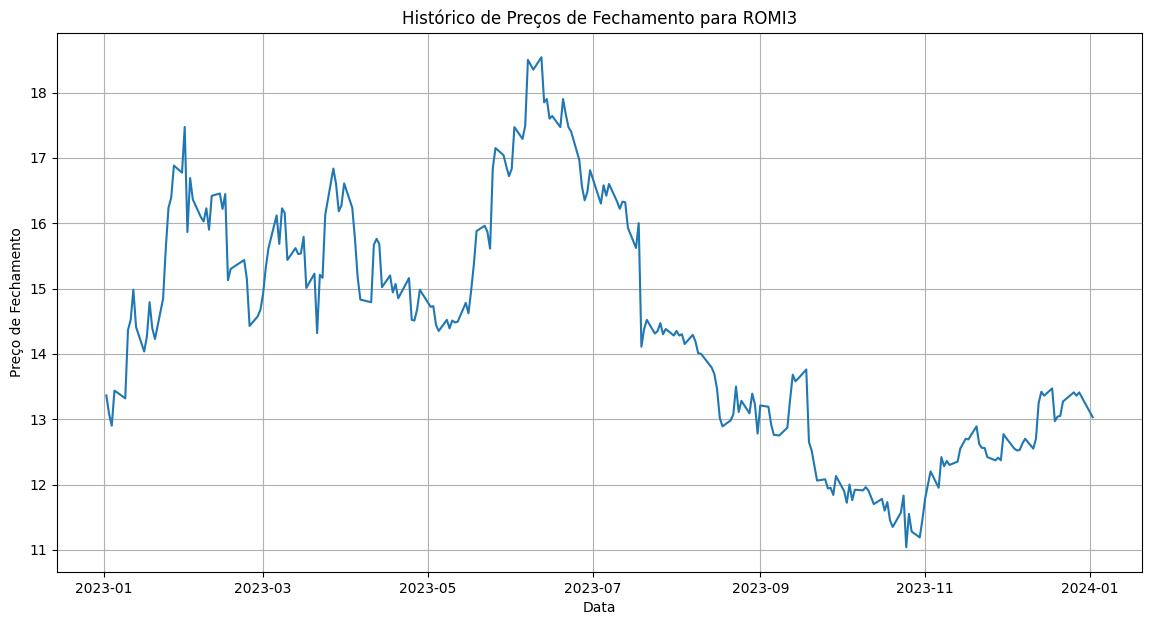

 GMAT3
[*********************100%%**********************]  1 of 1 completed


Open  High   Low  Close  Adj Close   Volume
Date                                                   
2023-01-02  6.29  6.30  5.96   6.07       6.07  3633100
2023-01-03  6.06  6.07  5.67   5.71       5.71  6931400
2023-01-04  5.73  6.03  5.65   5.95       5.95  6749600
2023-01-05  5.98  6.27  5.98   6.20       6.20  7637500
2023-01-06  6.21  6.43  6.13   6.27       6.27  5663300
...          ...   ...   ...    ...        ...      ...
2023-12-22  7.04  7.08  6.84   6.88       6.88  4989300
2023-12-26  6.85  7.20  6.80   7.17       7.17  6073800
2023-12-27  7.14  7.18  7.04   7.04       7.04  5659200
2023-12-28  7.06  7.23  6.98   7.18       7.18  4717700
2024-01-02  7.13  7.13  6.87   6.89       6.89  3178000

[249 rows x 6 columns]

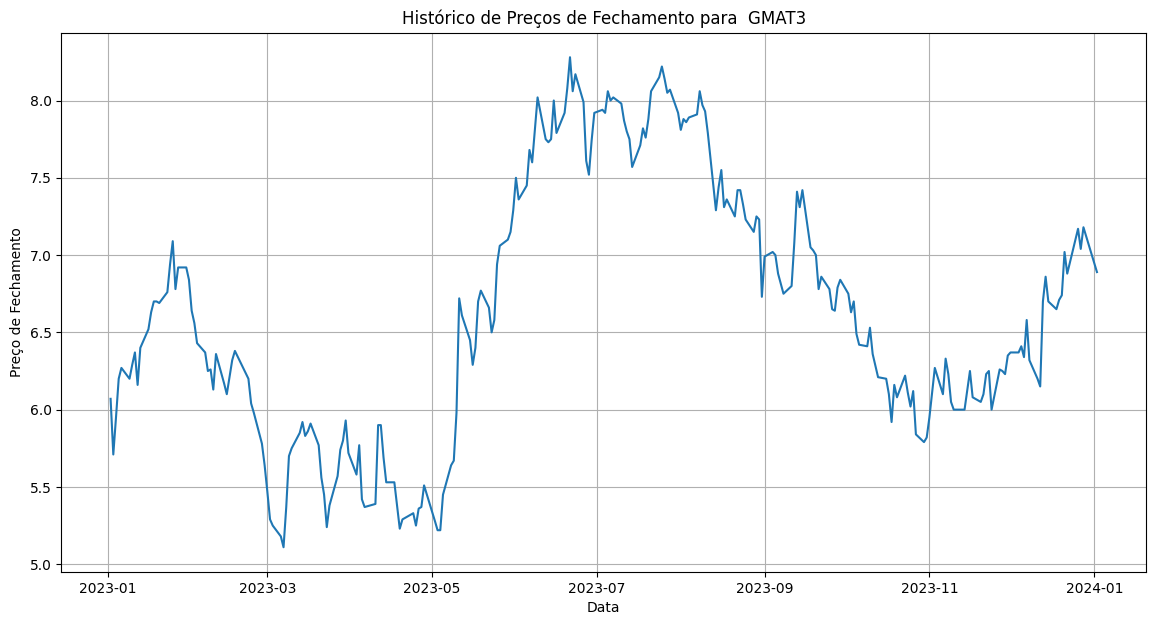

VULC3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-02  12.300000  12.570000  11.580000  11.900000  11.294520  508000
2023-01-03  11.700000  12.030000  11.440000  11.540000  10.952837  384500
2023-01-04  11.550000  11.870000  11.460000  11.510000  10.924364  211800
2023-01-05  11.640000  11.900000  11.480000  11.830000  11.228082  242400
2023-01-06  11.830000  12.080000  11.640000  11.810000  11.209101  260000
...               ...        ...        ...        ...        ...     ...
2023-12-22  20.750000  20.830000  20.309999  20.469999  20.469999  179300
2023-12-26  20.469999  20.480000  19.900000  20.219999  20.219999  452800
2023-12-27  20.200001  20.200001  19.840000  20.139999  20.139999  329900
2023-12-28  20.170000  20.170000  19.600000  20.139999  20.139999  760300
2024-01-02  19.940001  20.309999  19.690001  19.719999  19.719999  704600

[249 rows x 6 columns]

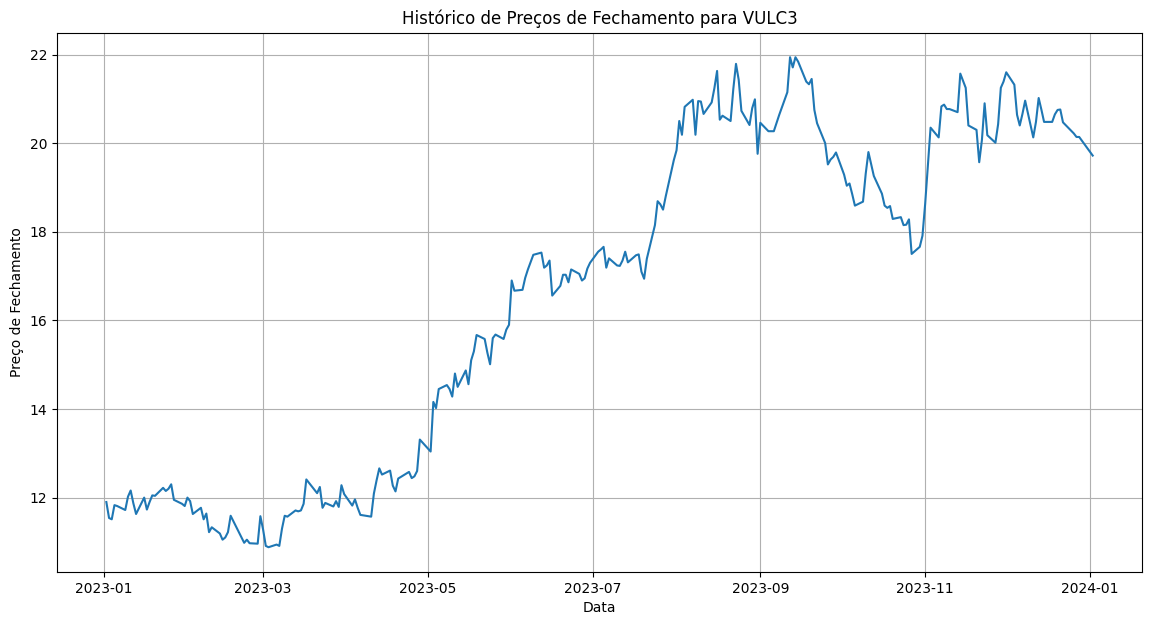

 CURY3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  12.500000  12.500000  11.660000  11.830000  10.988388  1272700
2023-01-03  11.850000  11.890000  11.580000  11.600000  10.774751  1264400
2023-01-04  11.630000  11.870000  11.530000  11.640000  10.811906  1076100
2023-01-05  11.700000  12.030000  11.640000  11.850000  11.006966  1447500
2023-01-06  11.870000  12.600000  11.870000  12.100000  11.239180  1755100
...               ...        ...        ...        ...        ...      ...
2023-12-22  17.620001  17.780001  17.490000  17.610001  17.610001   887800
2023-12-26  17.559999  17.820000  17.559999  17.610001  17.610001  1120700
2023-12-27  17.620001  17.860001  17.590000  17.750000  17.750000   631800
2023-12-28  17.790001  17.990000  17.600000  17.990000  17.990000  2303000
2024-01-02  17.809999  18.090000  17.540001  17.540001  17.540001  2066400

[249 rows x 6 columns]

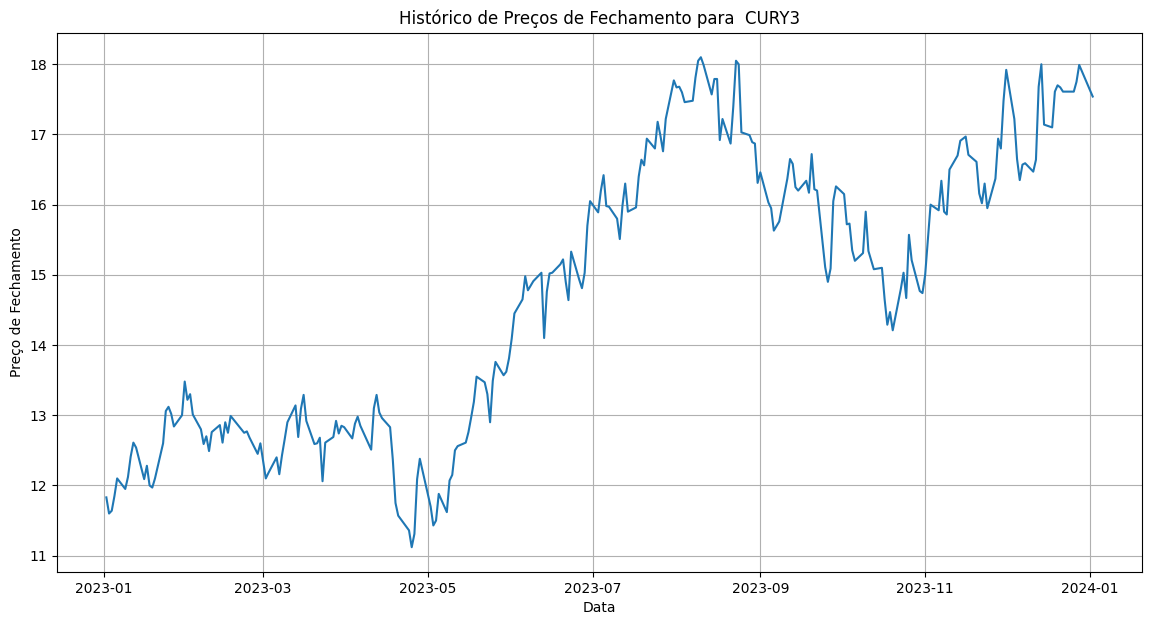

PETR4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-01-02  23.540001  23.809999  22.799999  22.920000  17.760122   78424700
2023-01-03  22.940001  23.100000  22.129999  22.340000  17.310696   96750300
2023-01-04  21.959999  23.590000  21.830000  23.049999  17.860855  129504000
2023-01-05  23.340000  24.040001  23.150000  23.879999  18.504002   73886000
2023-01-06  23.940001  24.320000  23.549999  23.740000  18.395519   51851500
...               ...        ...        ...        ...        ...        ...
2023-12-22  36.500000  36.799999  36.369999  36.740002  36.740002   31234700
2023-12-26  36.860001  37.369999  36.830002  37.330002  37.330002   23466800
2023-12-27  37.320000  37.430000  37.130001  37.360001  37.360001   19588500
2023-12-28  37.230000  37.360001  37.040001  37.240002  37.240002   21421900
2024-01-02  37.439999  37.889999  37.400002  37.779999  37.779999   24043800

[249 rows x 6 columns]

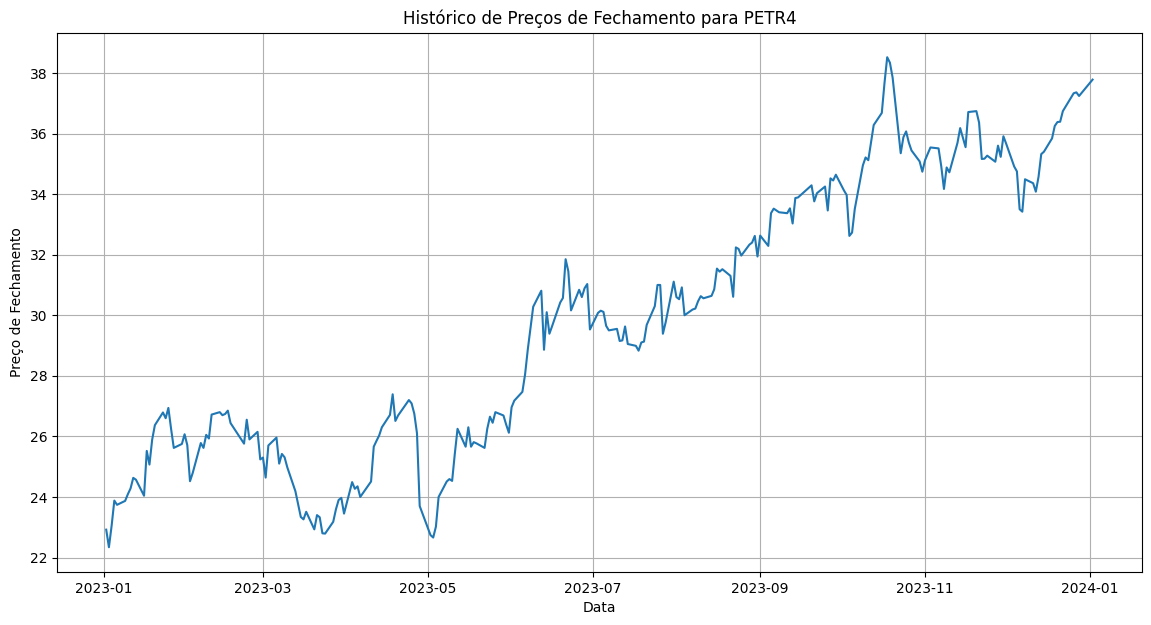

VALE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  88.680000  89.900002  88.529999  89.400002  84.082298  12783800
2023-01-03  89.400002  90.089996  88.889999  89.239998  83.931808  25332600
2023-01-04  89.300003  89.650002  87.949997  89.400002  84.082298  26395300
2023-01-05  89.459999  91.680000  89.000000  90.900002  85.493065  29085600
2023-01-06  91.000000  92.739998  91.000000  92.339996  86.847412  31420600
...               ...        ...        ...        ...        ...       ...
2023-12-22  77.129997  78.199997  76.290001  76.389999  76.389999  26277000
2023-12-26  77.160004  77.449997  76.660004  76.660004  76.660004  12149500
2023-12-27  76.849998  77.550003  76.849998  77.400002  77.400002  13821200
2023-12-28  77.000000  77.459999  76.750000  77.199997  77.199997  16545800
2024-01-02  77.599998  78.180000  76.589996  77.050003  77.050003  18021800

[249 rows x 6 columns]

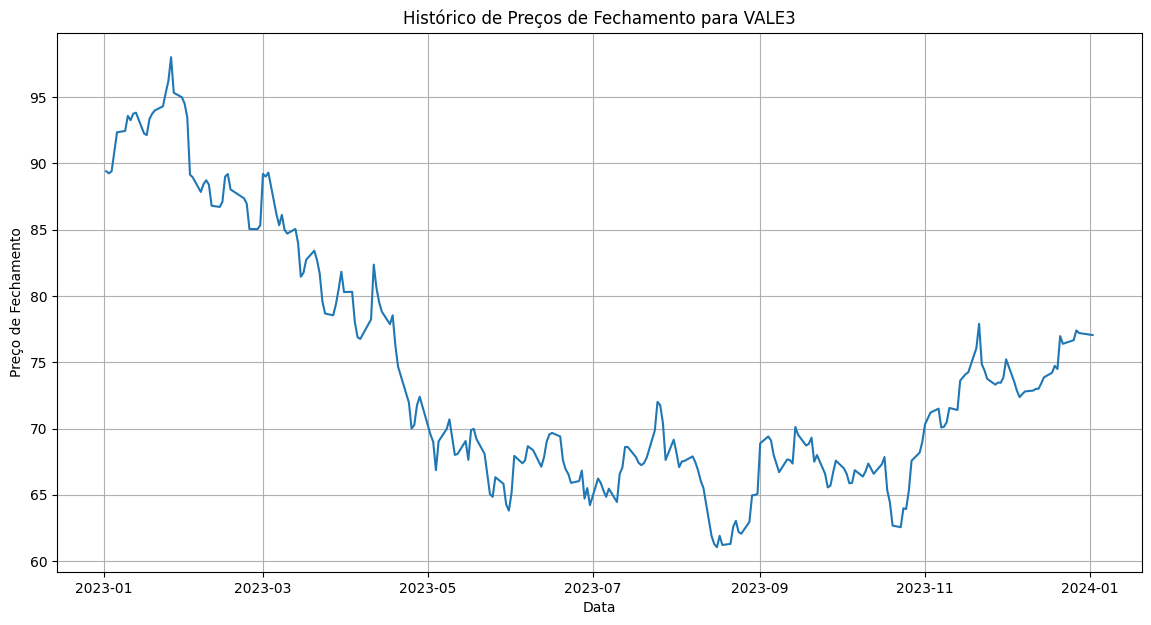

ITUB4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  24.430000  24.530001  24.040001  24.490000  23.388268  23340700
2023-01-03  24.490000  24.650000  23.830000  23.980000  22.901203  29873800
2023-01-04  24.059999  24.520000  23.879999  24.049999  22.968060  29881500
2023-01-05  24.100000  24.910000  24.020000  24.799999  23.684320  36322800
2023-01-06  24.930000  25.309999  24.799999  25.230000  24.094975  37628200
...               ...        ...        ...        ...        ...       ...
2023-12-22  32.820000  33.540001  32.799999  33.310001  33.292694  32650500
2023-12-26  33.369999  33.779999  33.230000  33.650002  33.632519  23135400
2023-12-27  33.610001  33.950001  33.570000  33.880001  33.862396  18176500
2023-12-28  33.880001  33.970001  33.740002  33.970001  33.952351  12555300
2024-01-02  33.889999  33.889999  33.240002  33.520000  33.520000  18948200

[249 rows x 6 columns]

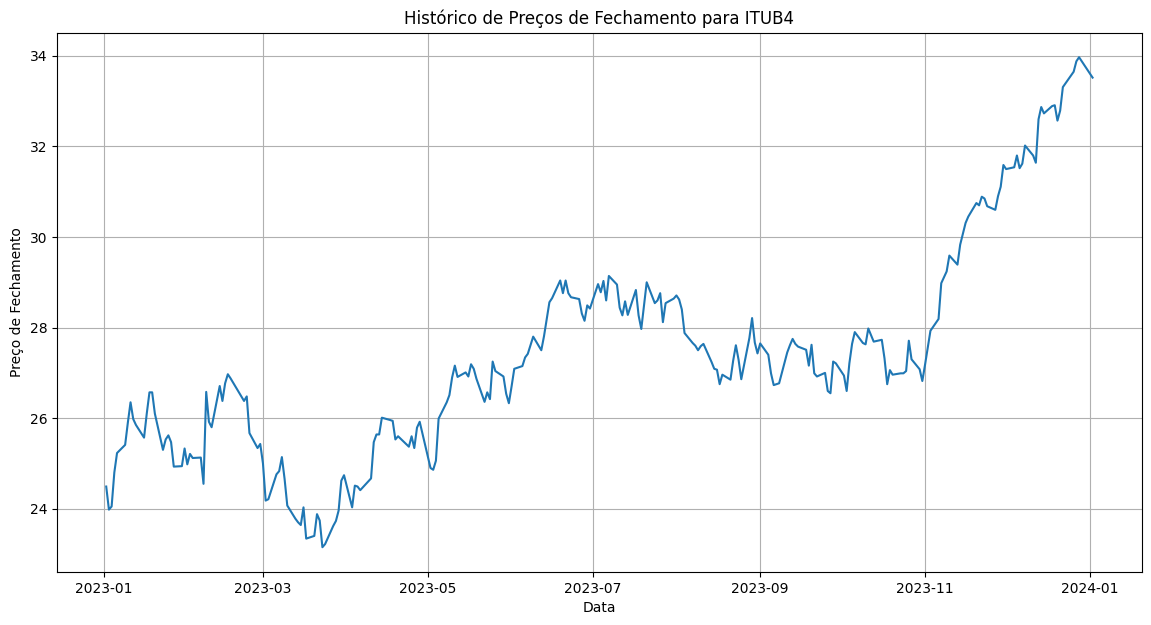

ABEV3
[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-01-02  14.40  14.45  14.02  14.19  13.485133  14995900
2023-01-03  14.16  14.39  14.11  14.17  13.466127  36363800
2023-01-04  14.28  14.47  14.08  14.25  13.542153  23791800
2023-01-05  14.27  14.41  14.14  14.29  13.580167  31031500
2023-01-06  14.30  14.36  14.16  14.32  13.608676  20889800
...           ...    ...    ...    ...        ...       ...
2023-12-22  13.69  13.83  13.66  13.71  13.710000  19864700
2023-12-26  13.72  13.81  13.69  13.77  13.770000   6884800
2023-12-27  13.78  13.84  13.72  13.84  13.840000  10305900
2023-12-28  13.80  13.85  13.73  13.73  13.730000  16500300
2024-01-02  13.72  13.73  13.59  13.71  13.710000  11690200

[249 rows x 6 columns]

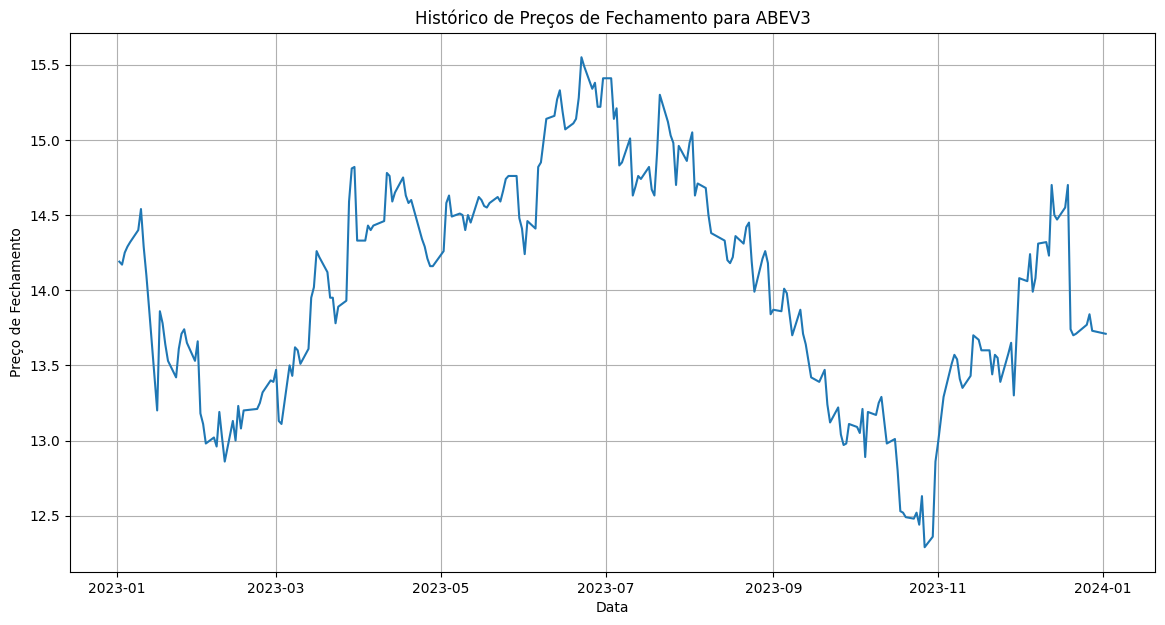

WEGE3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-02  38.500000  38.500000  37.740002  38.099998  37.490429  3017700
2023-01-03  38.110001  38.369999  36.889999  37.150002  36.555630  5662900
2023-01-04  37.330002  37.689999  36.660000  37.400002  36.801632  6169800
2023-01-05  37.590000  37.900002  37.259998  37.480000  36.880348  6660600
2023-01-06  37.490002  38.270000  37.299999  38.029999  37.421543  4071700
...               ...        ...        ...        ...        ...      ...
2023-12-22  36.389999  36.549999  36.169998  36.509998  36.509998  4733200
2023-12-26  36.570000  36.919998  36.450001  36.720001  36.720001  3173100
2023-12-27  36.720001  36.990002  36.509998  36.840000  36.840000  2730800
2023-12-28  36.840000  37.220001  36.709999  36.910000  36.910000  3536300
2024-01-02  36.910000  37.049999  36.330002  36.570000  36.570000  3991200

[249 rows x 6 columns]

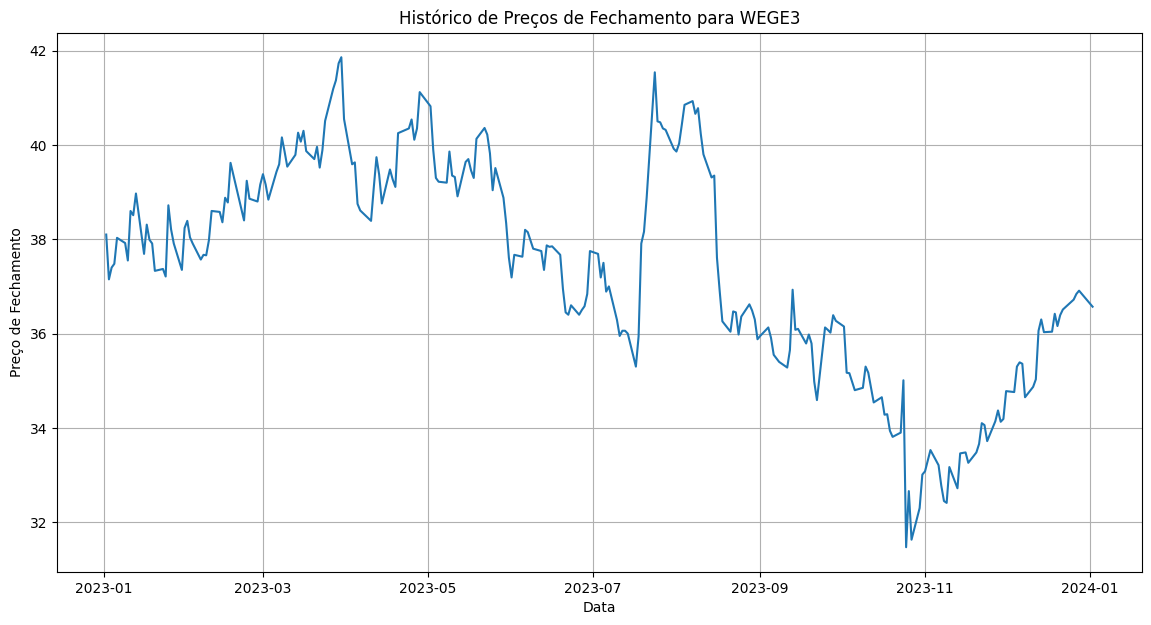

BBDC4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-01-02  14.900000  14.990000  14.660000  14.750000  13.384402   24748300
2023-01-03  14.760000  14.780000  13.950000  14.000000  12.720203  127764400
2023-01-04  14.150000  14.230000  13.660000  14.040000  12.756548  153235200
2023-01-05  14.110000  14.710000  14.070000  14.650000  13.310784  164949200
2023-01-06  14.660000  15.080000  14.500000  15.060000  13.683308   86788300
...               ...        ...        ...        ...        ...        ...
2023-12-22  16.719999  16.920000  16.540001  16.830000  16.810934   36672400
2023-12-26  16.830000  16.930000  16.799999  16.879999  16.860876   13390200
2023-12-27  16.850000  17.059999  16.740000  16.980000  16.960764   17838700
2023-12-28  17.000000  17.129999  16.950001  17.090000  17.070641   14852700
2024-01-02  16.950001  17.010000  16.670000  16.750000  16.731026   31715700

[249 rows x 6 columns]

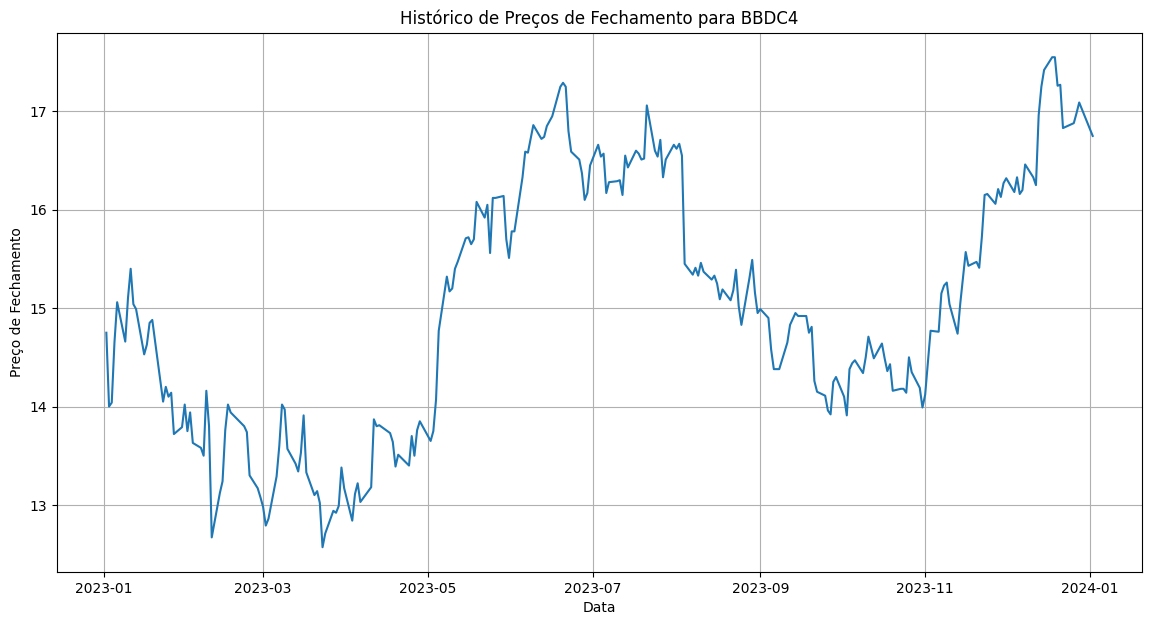

BBAS3
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  34.220001  34.220001  32.900002  33.259998  30.695686  11778500
2023-01-03  33.259998  33.400002  32.419998  32.639999  30.123491  10773700
2023-01-04  32.830002  33.259998  32.560001  33.060001  30.511114   9759500
2023-01-05  33.290001  34.740002  33.080002  34.570000  31.904694  16968800
2023-01-06  34.650002  35.270000  34.439999  35.049999  32.347683  14752300
...               ...        ...        ...        ...        ...       ...
2023-12-22  54.500000  54.619999  54.070000  54.439999  54.439999   7303200
2023-12-26  54.439999  54.959999  54.299999  54.939999  54.939999   3983200
2023-12-27  54.799999  54.970001  54.580002  54.860001  54.860001   3372500
2023-12-28  54.860001  55.389999  54.689999  55.389999  55.389999   5840400
2024-01-02  55.119999  55.279999  54.450001  54.759998  54.759998   8170500

[249 rows x 6 columns]

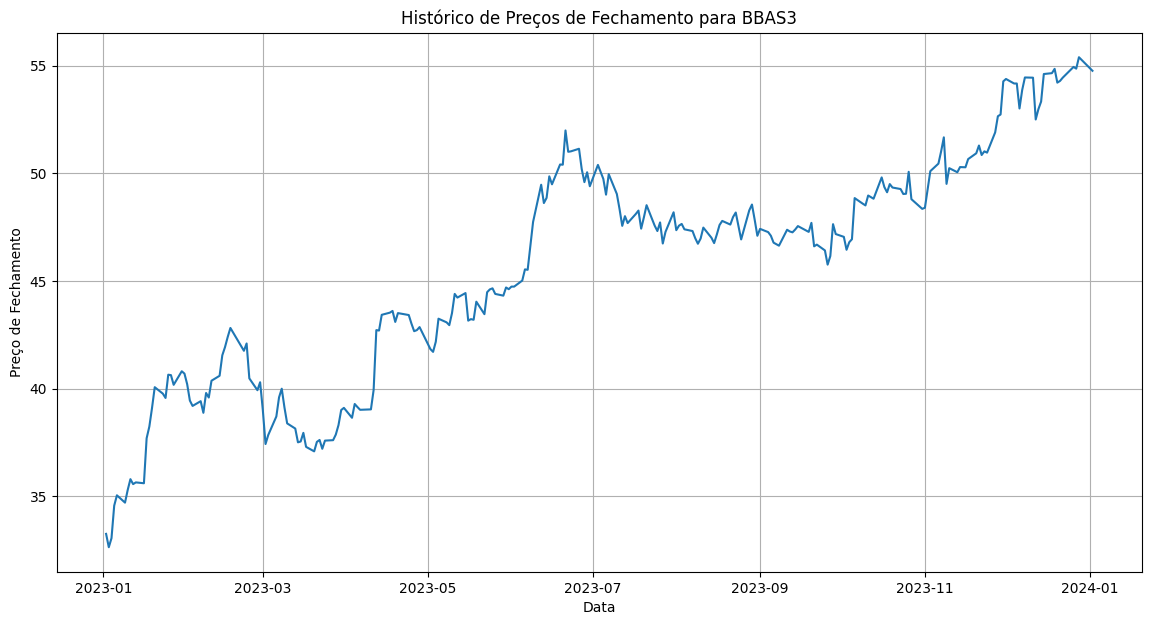

BPAC11
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  23.170000  23.200001  22.080000  22.379999  21.813900   8056700
2023-01-03  22.500000  22.510000  21.209999  21.309999  20.770967  10776400
2023-01-04  21.860001  22.330000  21.379999  21.990000  21.433769  11174400
2023-01-05  22.180000  22.850000  21.850000  22.730000  22.304863  11518200
2023-01-06  22.620001  23.120001  22.500000  22.860001  22.432432   5299900
...               ...        ...        ...        ...        ...       ...
2023-12-22  36.880001  36.880001  36.180000  36.799999  36.799999   4830100
2023-12-26  36.799999  37.369999  36.599998  37.290001  37.290001   3360500
2023-12-27  37.099998  37.889999  37.029999  37.560001  37.560001   5075700
2023-12-28  37.549999  38.119999  37.430000  37.610001  37.610001   5348800
2024-01-02  37.610001  37.820000  36.849998  37.230000  37.230000   5020500

[248 rows x 6 columns]

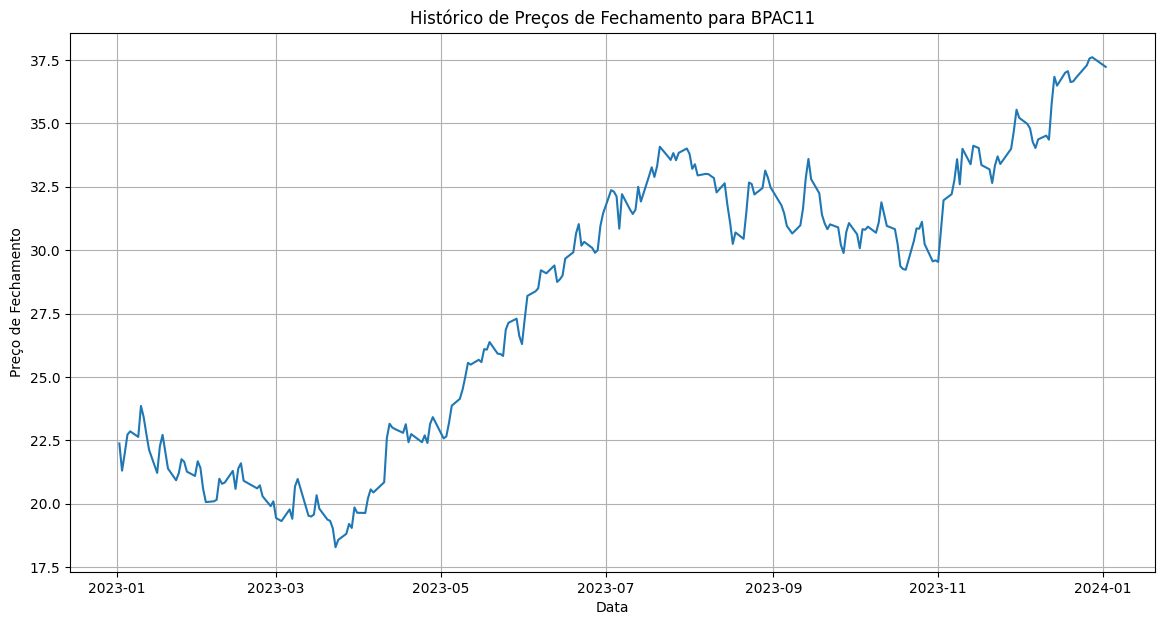

BCSA34
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-02  15.620000  15.830000  15.000000  15.740000  15.219106    1000
2023-01-03  15.820000  16.530001  15.740000  16.530001  15.982962    7365
2023-01-04  16.530001  17.070000  16.530001  17.000000  16.437408    2262
2023-01-05  17.000000  17.000000  16.530001  16.660000  16.108660    4117
2023-01-06  16.660000  17.000000  16.590000  16.840000  16.282703    1856
...               ...        ...        ...        ...        ...     ...
2023-12-22  20.660000  20.790001  20.000000  20.260000  20.260000    1122
2023-12-26  20.260000  20.260000  19.900000  20.129999  20.129999    2198
2023-12-27  20.540001  20.540001  20.129999  20.190001  20.190001     770
2023-12-28  20.240000  20.240000  20.020000  20.230000  20.230000    2231
2024-01-02  20.230000  20.469999  20.200001  20.469999  20.469999    2379

[249 rows x 6 columns]

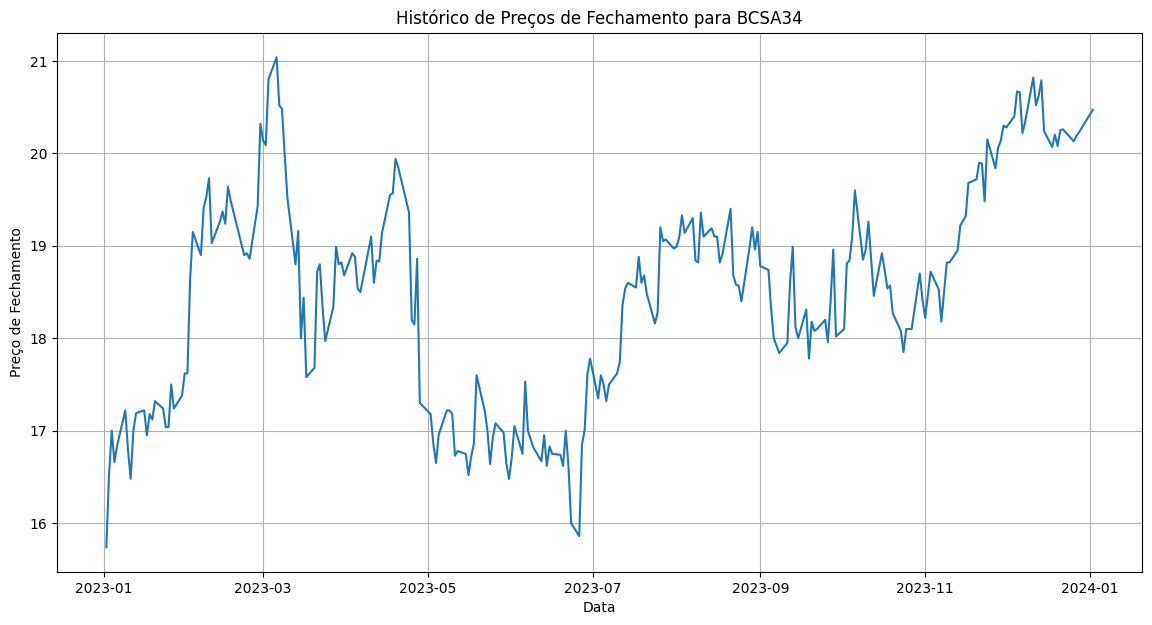

ITSA4
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02   8.004242   8.013726   7.833535   7.928372   7.416377  16011051
2023-01-03   7.937856   7.975791   7.700763   7.729215   7.230082  17995298
2023-01-04   7.786117   7.852503   7.710247   7.795600   7.292180  19707815
2023-01-05   7.833535   7.928372   7.767149   7.909405   7.398637  28182989
2023-01-06   7.918889   8.070628   7.918889   8.042177   7.522834  21406308
...               ...        ...        ...        ...        ...       ...
2023-12-22  10.120000  10.250000  10.100000  10.250000  10.250000  13166900
2023-12-26  10.250000  10.290000  10.190000  10.280000  10.280000  13047500
2023-12-27  10.250000  10.400000  10.230000  10.360000  10.360000  19380500
2023-12-28  10.360000  10.400000  10.300000  10.370000  10.370000  23414900
2024-01-02  10.310000  10.320000  10.130000  10.170000  10.170000  16813400

[249 rows x 6 columns]

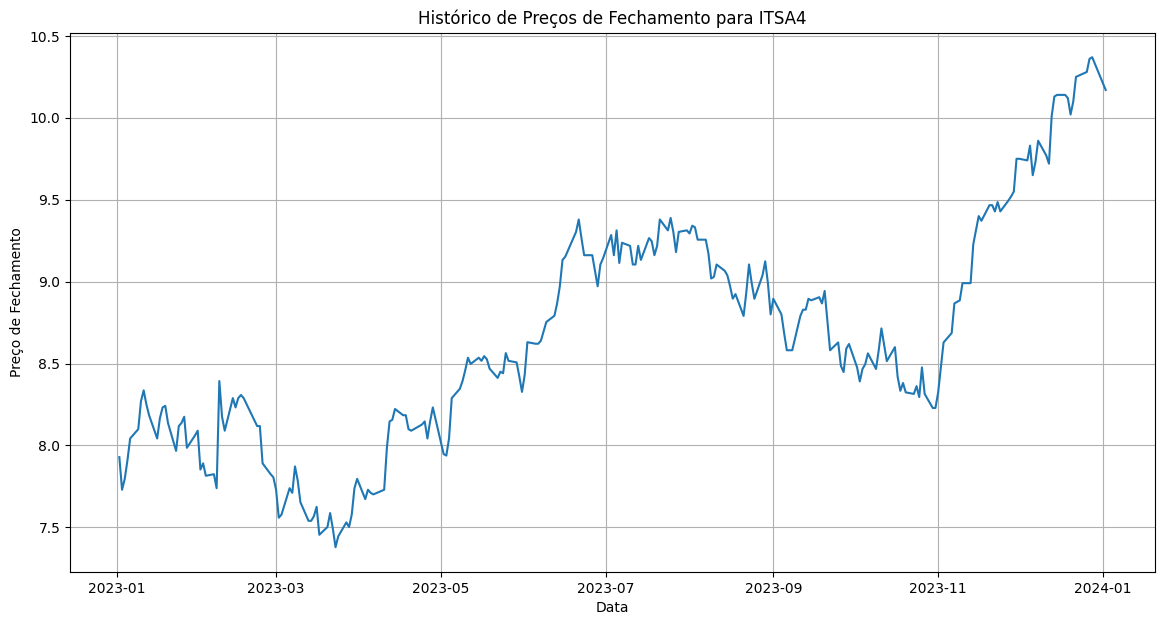

In [ ]:
for empresa in tabela['Sigla']:
    print(empresa)

    try:
        cotacao = yf.download(f'{empresa}.SA', start='2023-01-01', end='2024-01-03')
        display(cotacao)
        plt.figure(figsize=(14, 7))
        plt.plot(cotacao['Close'])
        plt.title(f'Histórico de Preços de Fechamento para {empresa}')
        plt.xlabel('Data')
        plt.ylabel('Preço de Fechamento')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Erro ao obter dados para {empresa}: {e}")

